In [ ]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
outdir = '/data/SO2/sio-kramosmusalem/02_ORL_noprescribe_flatTopoBdy/'
levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)

In [ ]:
depth = ds.Depth[:]
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

LATY = ds['YG'][:]
LONX = ds['XG'][:]-360
laty = ds.YG[:,0].data
lonx = ds.XG[0,:].data-360

Z = ds['Z'][:]
Zl = ds['Zl'][:]

# centers mask
hFacC = ds['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,648)*600

In [ ]:
sns.set_style('white')
fig, ax = plt.subplots(1,1,figsize=(8,7))
ax.set_facecolor('tan')
pc = ax.contourf(LON,LAT,np.ma.masked_array(depth, mask=mask_dep),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(lon,lat,depth, colors=['0','0.3','0.6'], levels=[0,20,250])
ax.axhline(lat[150], color='coral')
ax.axvline(lon[150], color='coral')

ax.axhline(lat[14], color='coral')
ax.axvline(lon[14], color='coral')

#ax.axhline(lat[12], color='gold')
#ax.axvline(lon[12], color='gold')

cb.set_label('depth / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_xlim(-121,-114)
ax.set_ylim(27,35)
ax.set_aspect(1)

v, v and w at W and S open boundaries

-121.0 W


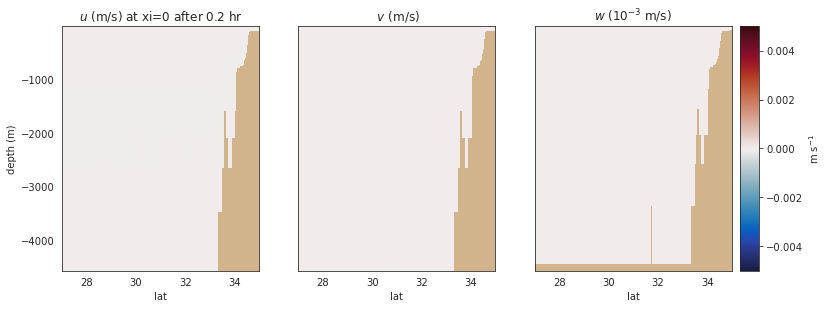

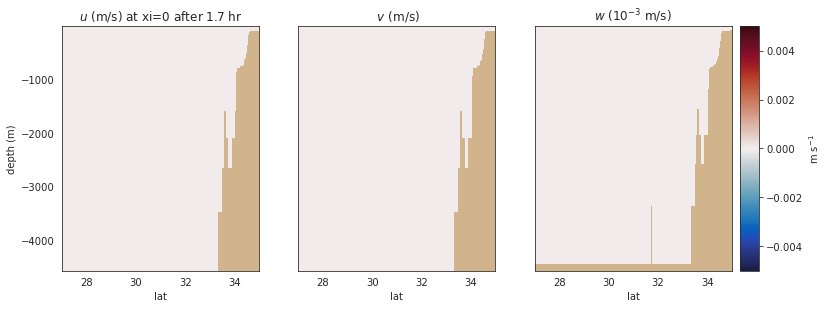

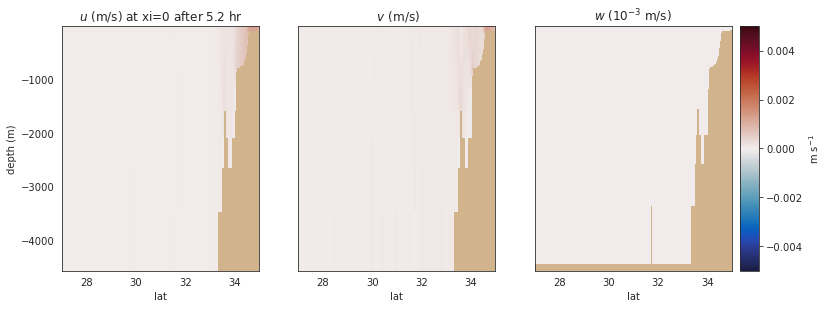

-121.0 W


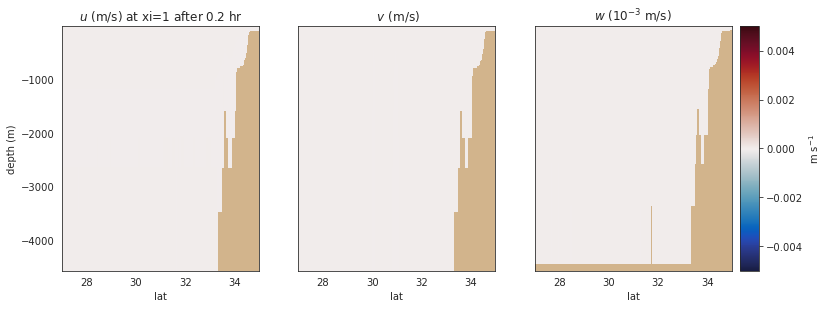

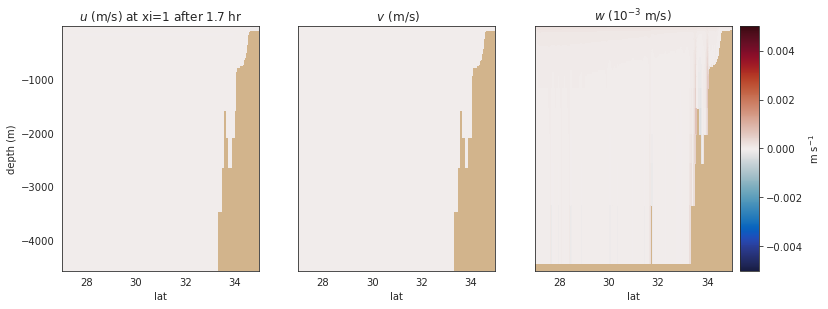

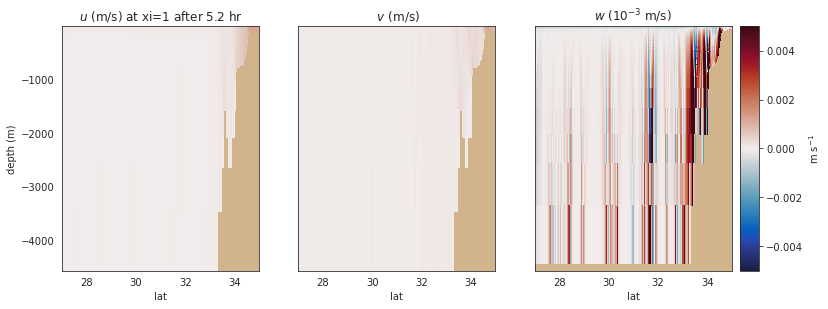

-121.0 W


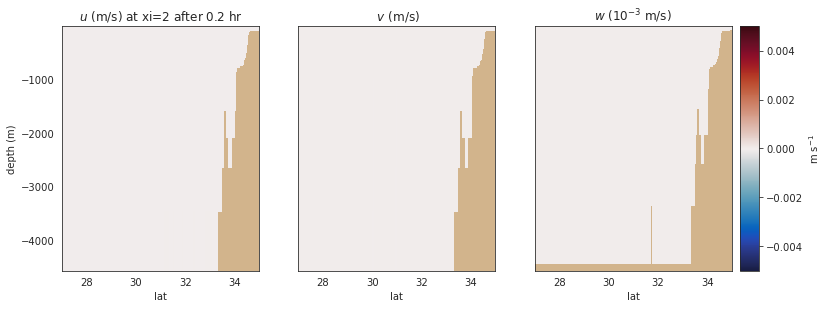

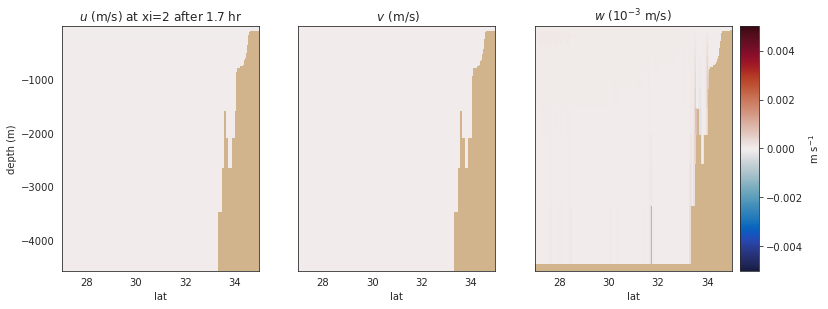

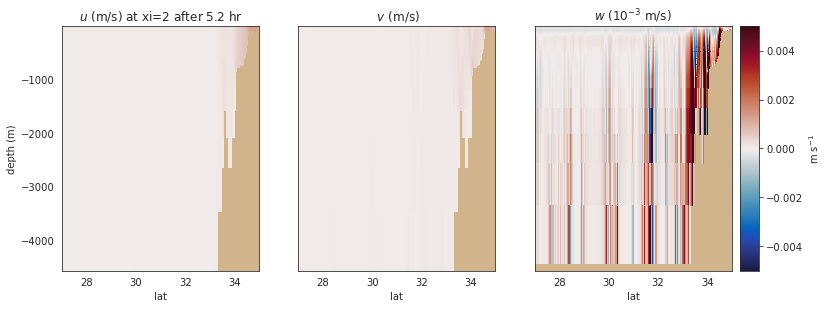

In [6]:
for xi in [0,1,2]:
    print('%1.1f W' %lon[xi])
    for ti in [1,10,31]:
        Wu = ds['UVEL'][ti,:,:,xi] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,:,xi]
        Ww = ds['WVEL'][ti,:,:,xi]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lat,Z, np.ma.masked_array(Wu, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-5E-3, vmax=5E-3)

        pc = ax1.pcolormesh(lat,Z, np.ma.masked_array(Wv, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-5E-3, vmax=5E-3)

        pc = ax2.pcolormesh(lat,Zl, np.ma.masked_array(Ww*1E3, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-5E-3, vmax=5E-3)

        norm = mpl.colors.Normalize(vmin=-5E-3, vmax=5E-3)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lat')
        ax1.set_xlabel('lat')
        ax2.set_xlabel('lat')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ (m/s) at xi=%d after %1.1f hr' %(xi,(ti*600)/(3600)))
        ax1.set_title(' $v$ (m/s)' )
        ax2.set_title('$w$ (10$^{-3}$ m/s) ')
        plt.show()


-118.6 W


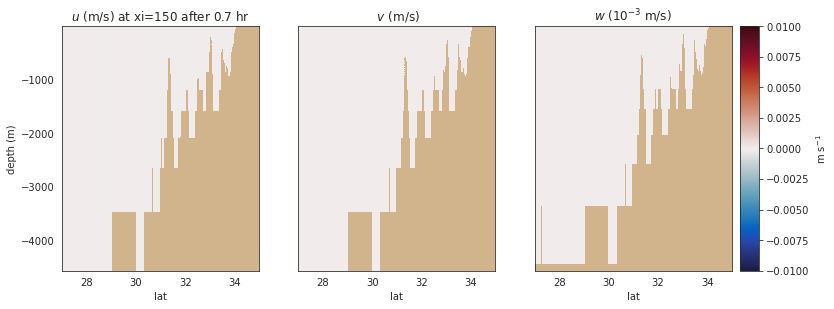

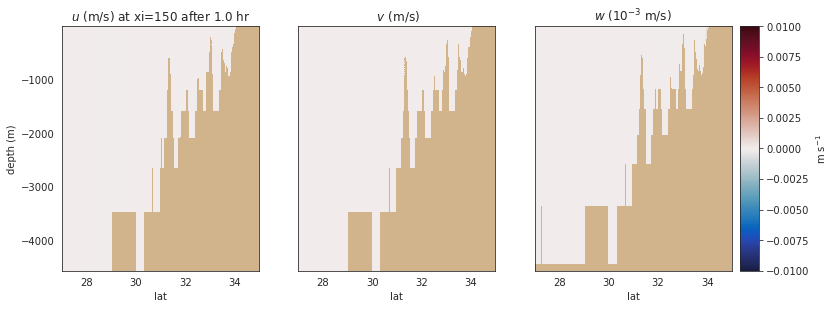

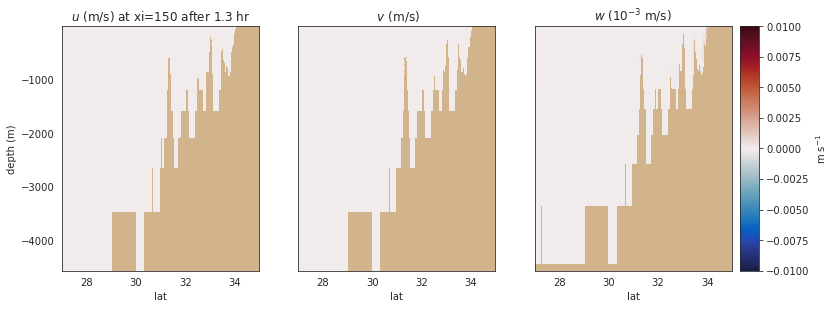

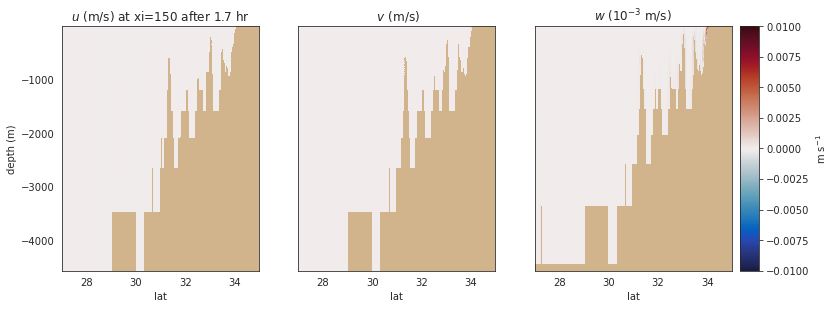

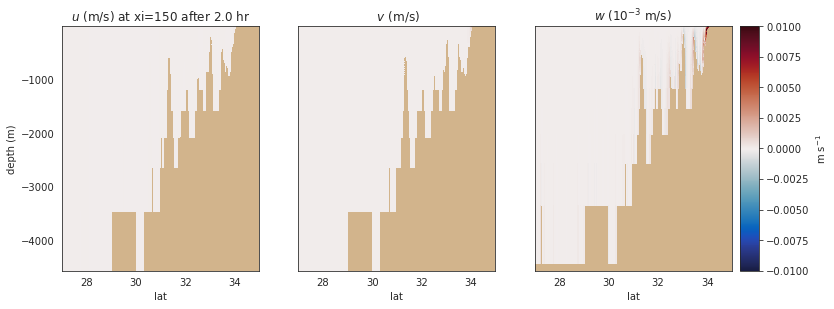

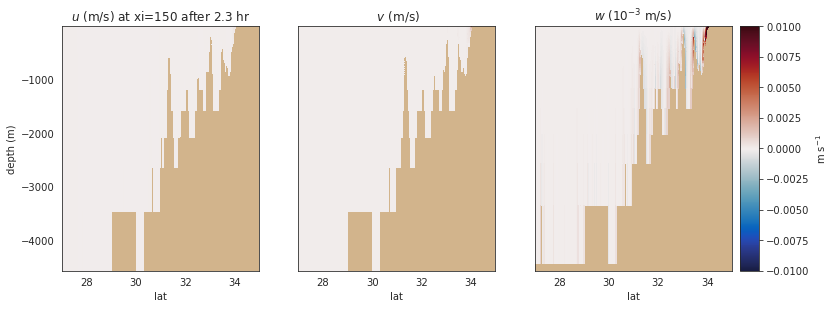

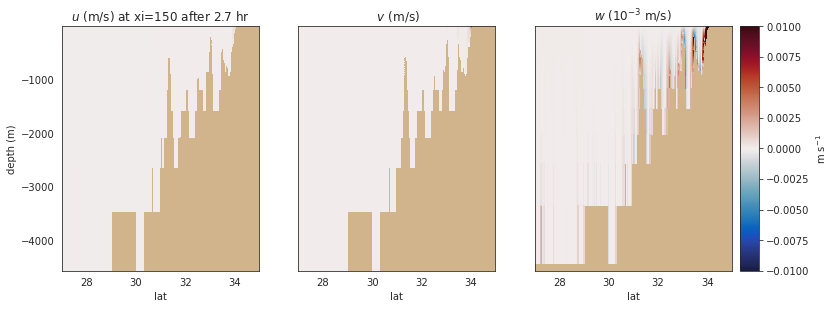

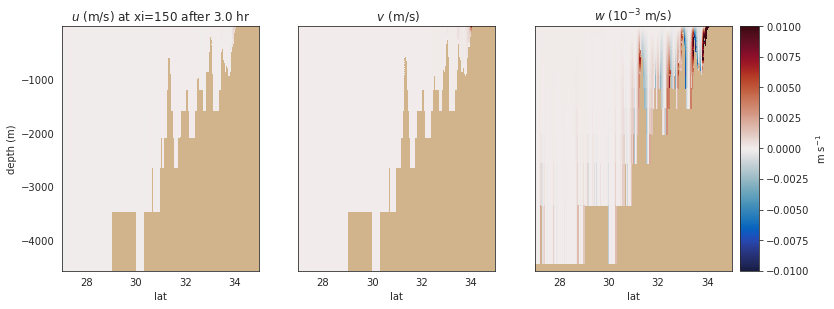

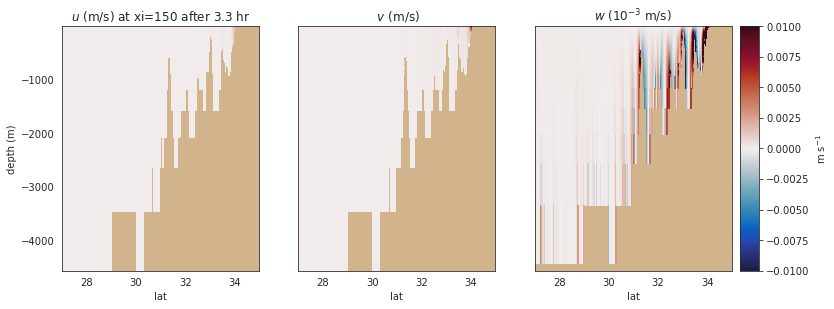

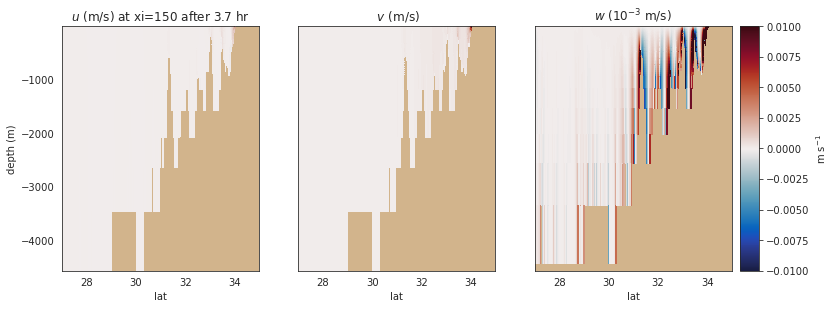

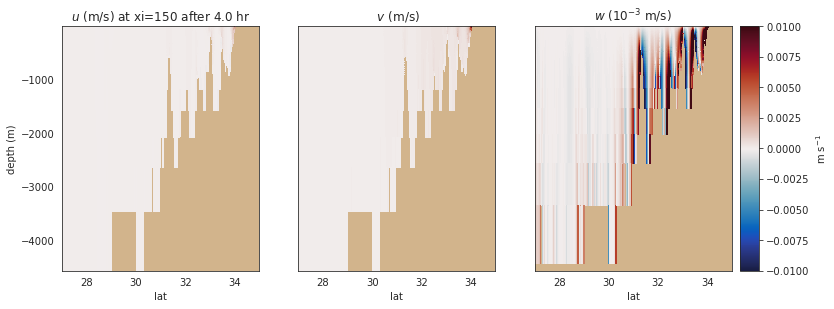

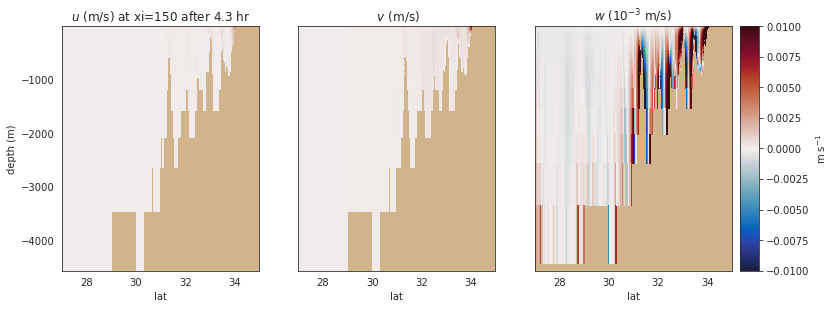

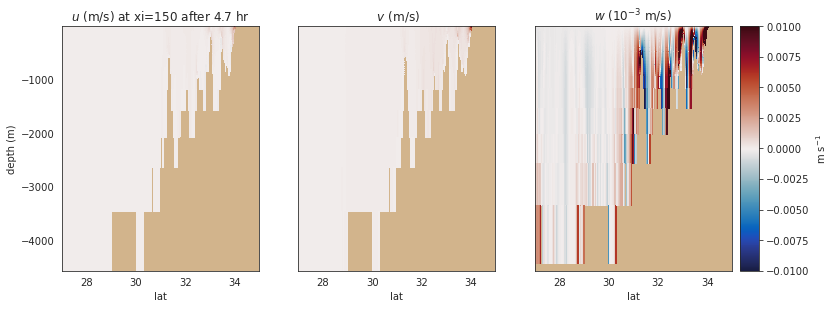

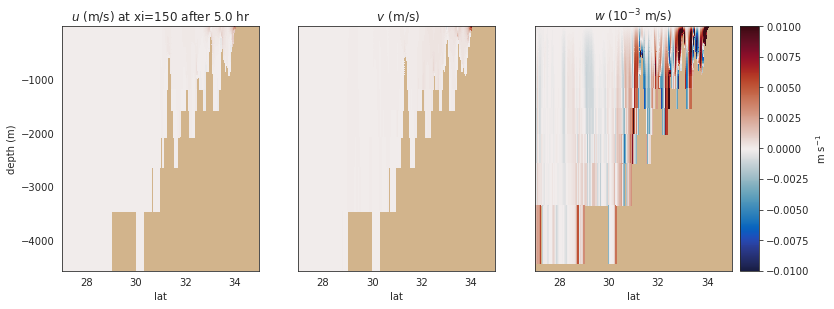

In [7]:
for xi in [150]:
    print('%1.1f W' %lon[xi])
    for ti in [4,6,8,10,12,14,16,18,20,22,24,26,28,30]:
        Wu = ds['UVEL'][ti,:,:,xi] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,:,xi]
        Ww = ds['WVEL'][ti,:,:,xi]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lat,Z, np.ma.masked_array(Wu, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        pc = ax1.pcolormesh(lat,Z, np.ma.masked_array(Wv, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        pc = ax2.pcolormesh(lat,Zl, np.ma.masked_array(Ww*1E3, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        norm = mpl.colors.Normalize(vmin=-1E-2, vmax=1E-2)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lat')
        ax1.set_xlabel('lat')
        ax2.set_xlabel('lat')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ (m/s) at xi=%d after %1.1f hr' %(xi,(ti*600)/(3600)))
        ax1.set_title(' $v$ (m/s)' )
        ax2.set_title('$w$ (10$^{-3}$ m/s) ')
        plt.show()


27.0 N


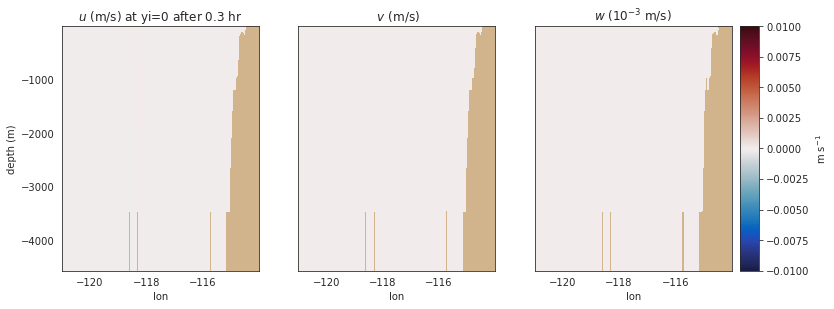

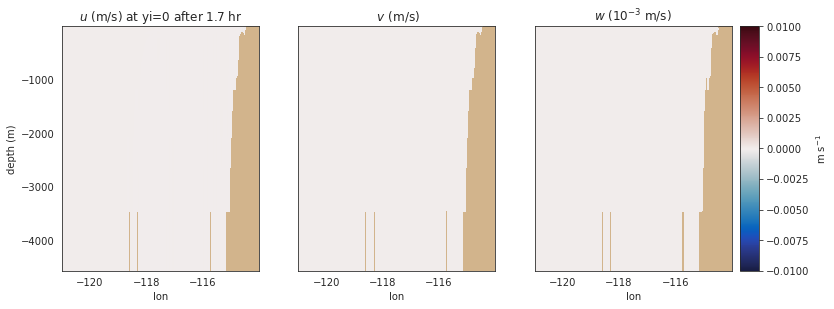

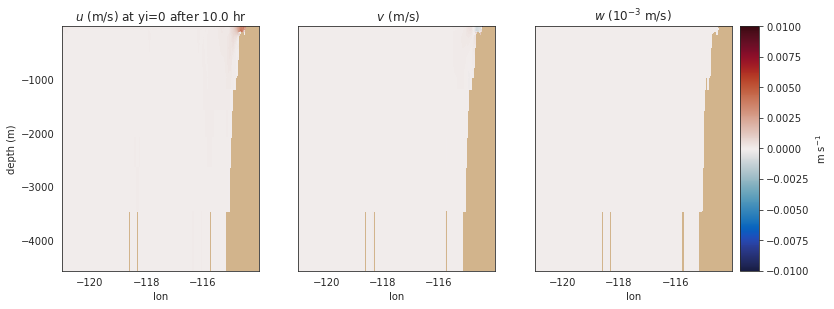

27.0 N


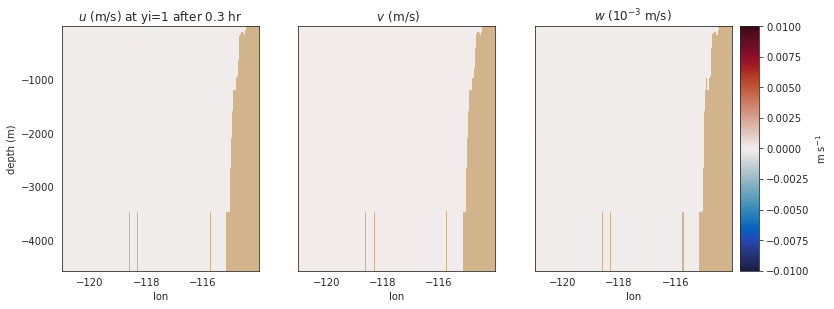

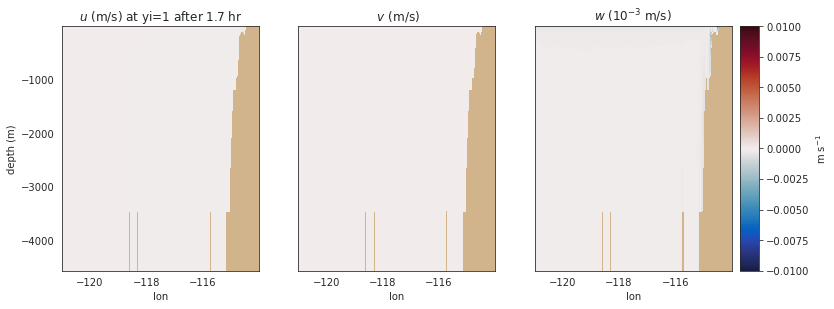

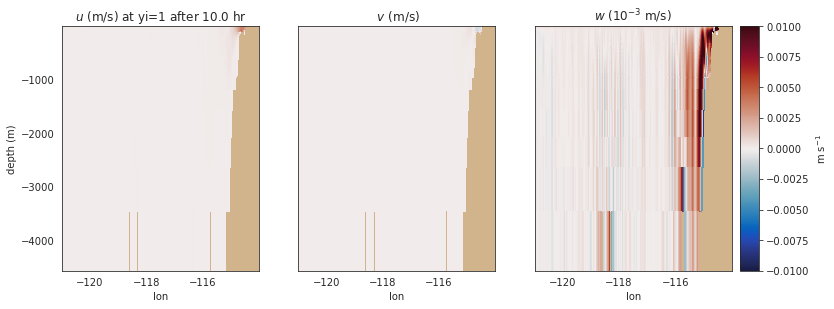

27.0 N


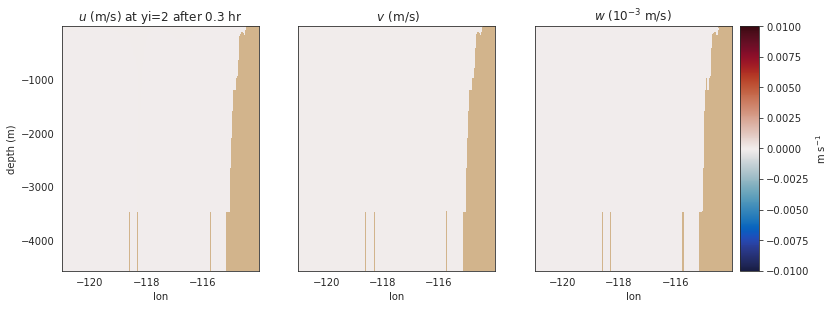

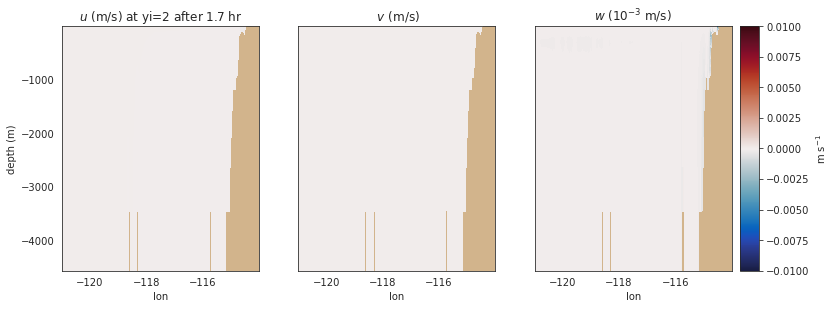

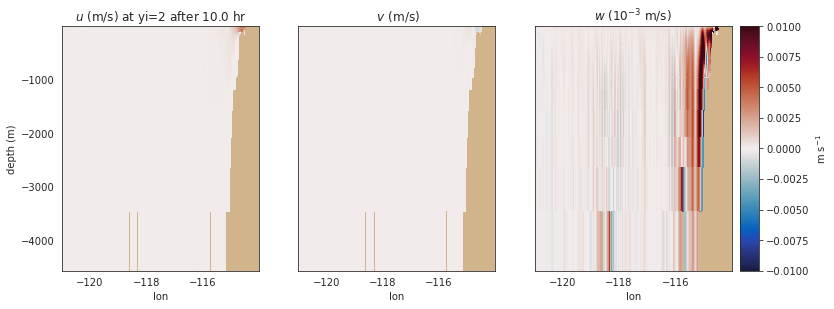

In [8]:
for yi in [0,1,2]:
    print('%1.1f N' %lat[yi])
    for ti in [2, 10, 60]:
        Wu = ds['UVEL'][ti,:,yi,:] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,yi,:]
        Ww = ds['WVEL'][ti,:,yi,:]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lon,Z, np.ma.masked_array(Wu, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        pc = ax1.pcolormesh(lon,Z, np.ma.masked_array(Wv, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        pc = ax2.pcolormesh(lon,Z, np.ma.masked_array(Ww*1E3, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        norm = mpl.colors.Normalize(vmin=-1E-2, vmax=1E-2)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lon')
        ax1.set_xlabel('lon')
        ax2.set_xlabel('lon')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ (m/s) at yi=%d after %1.1f hr' %(yi,(ti*600)/(3600)))
        ax1.set_title(' $v$ (m/s)' )
        ax2.set_title('$w$ (10$^{-3}$ m/s) ')
        plt.show()

29.4 N


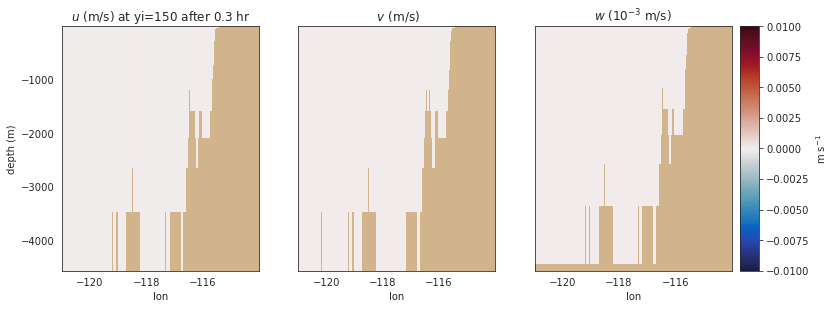

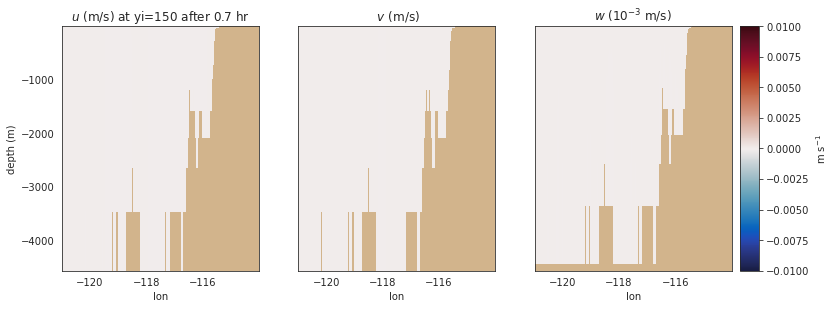

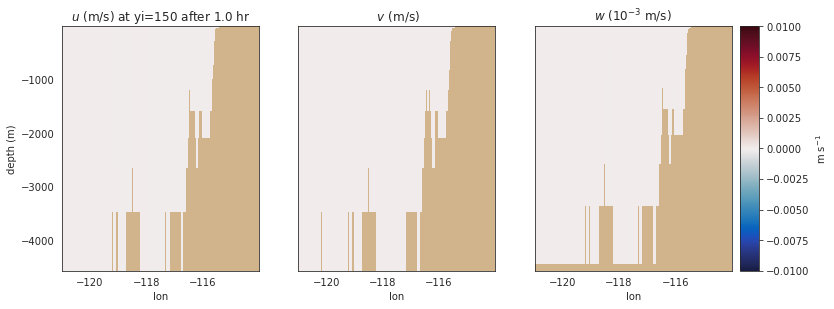

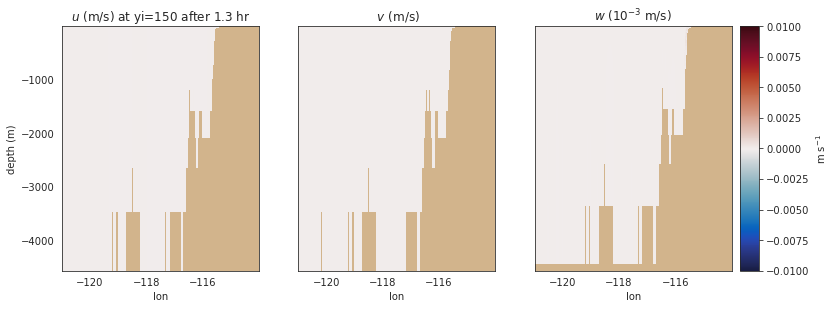

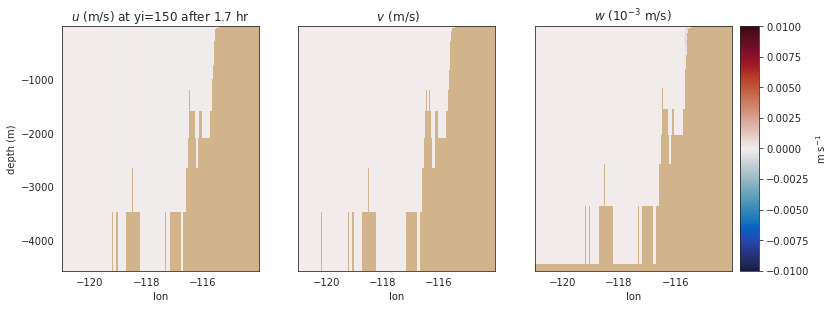

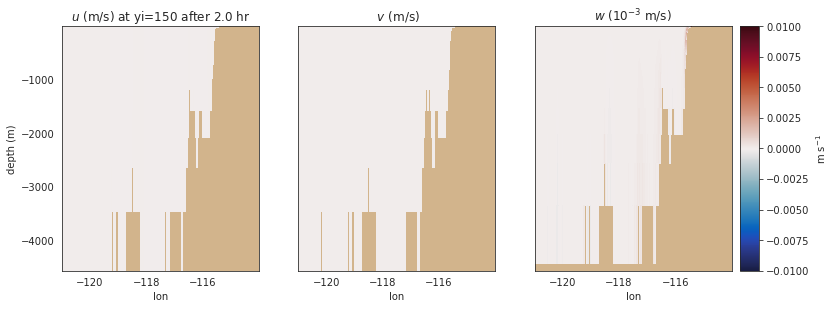

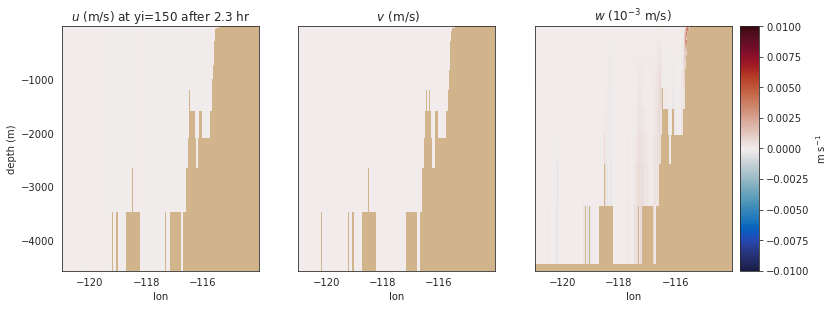

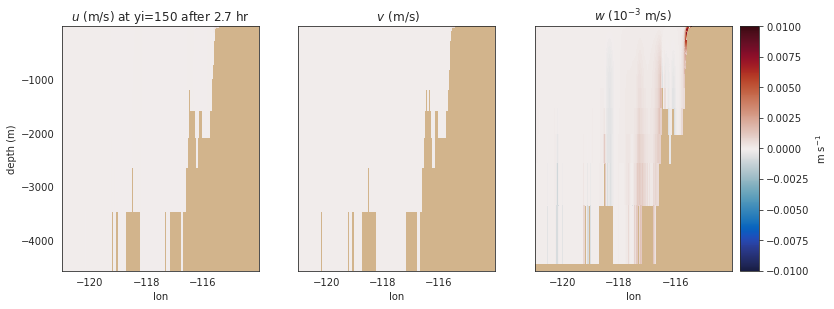

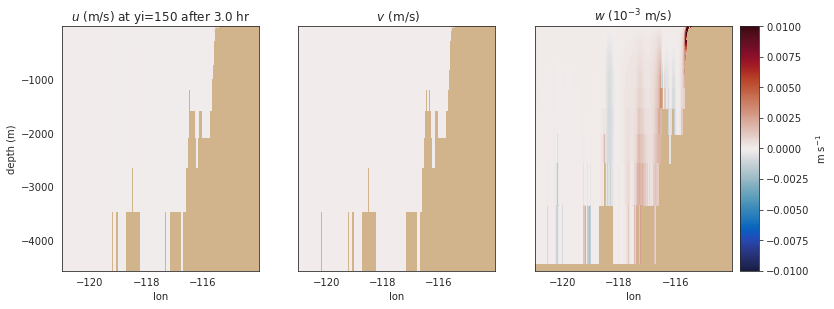

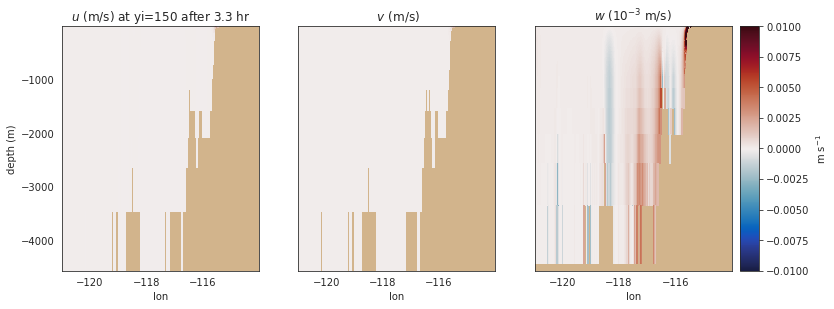

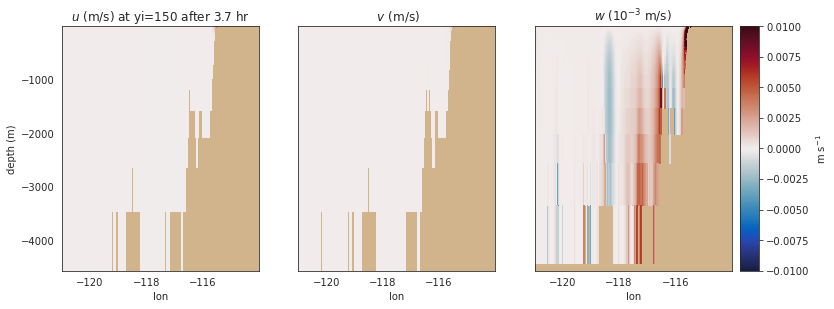

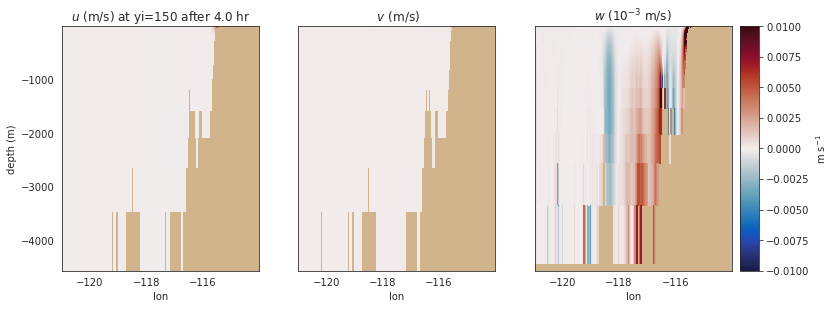

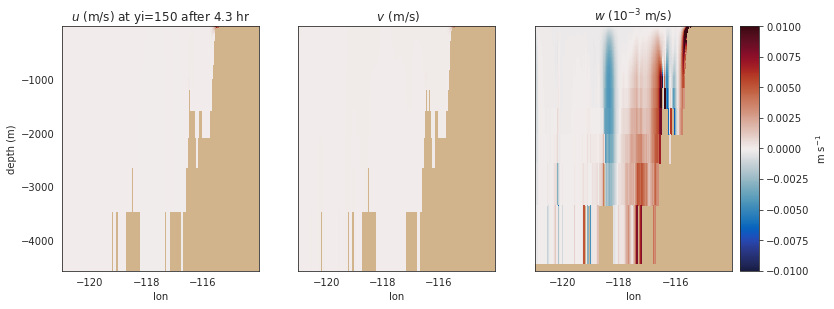

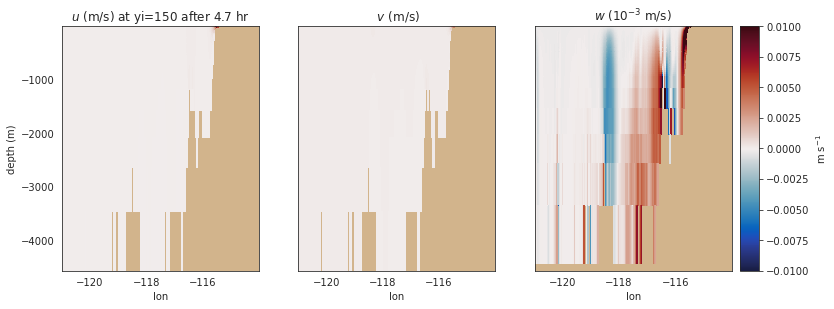

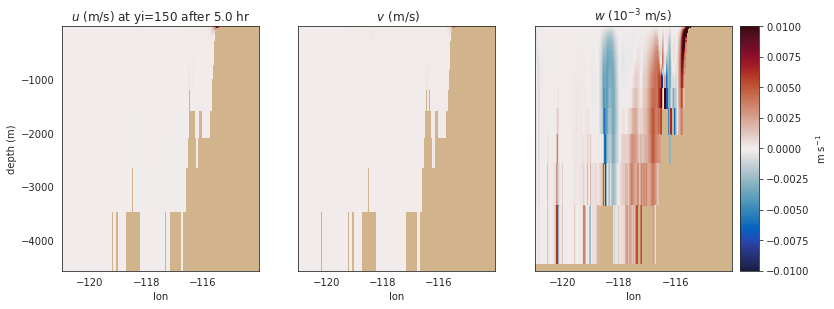

In [9]:
for yi in [150]:
    print('%1.1f N' %lat[yi])
    for ti in [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]:
        Wu = ds['UVEL'][ti,:,yi,:] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,yi,:]
        Ww = ds['WVEL'][ti,:,yi,:]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lon,Z, np.ma.masked_array(Wu, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        pc = ax1.pcolormesh(lon,Z, np.ma.masked_array(Wv, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        pc = ax2.pcolormesh(lon,Zl, np.ma.masked_array(Ww*1E3, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)

        norm = mpl.colors.Normalize(vmin=-1E-2, vmax=1E-2)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lon')
        ax1.set_xlabel('lon')
        ax2.set_xlabel('lon')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ (m/s) at yi=%d after %1.1f hr' %(yi,(ti*600)/(3600)))
        ax1.set_title(' $v$ (m/s)' )
        ax2.set_title('$w$ (10$^{-3}$ m/s) ')
        plt.show()

29.4 N


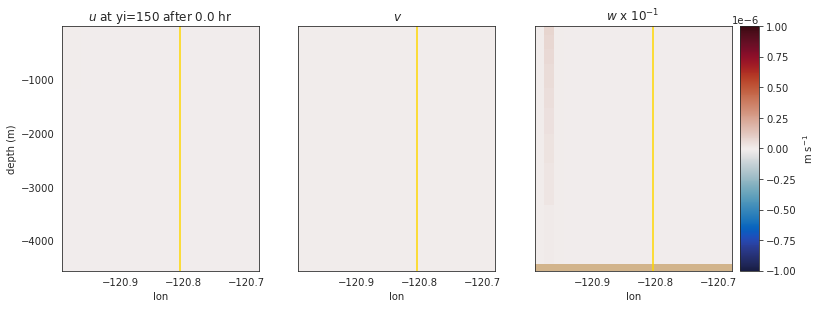

z,x indices: u[0,1]=2.022e-06, u[0,2]=8.635e-06, u[1,1]=1.320e-10, u[1,2]=-3.809e-09
z,x indices: v[0,0]=-2.788e-06, v[0,1]=-1.536e-05, v[1,0]=-9.163e-10, v[1,1]=-6.670e-09
z,x indices: w[0,0]=0.000e+00, w[0,1]=-2.190e-10, w[1,0]=0.000e+00, w[1,1]=8.517e-09


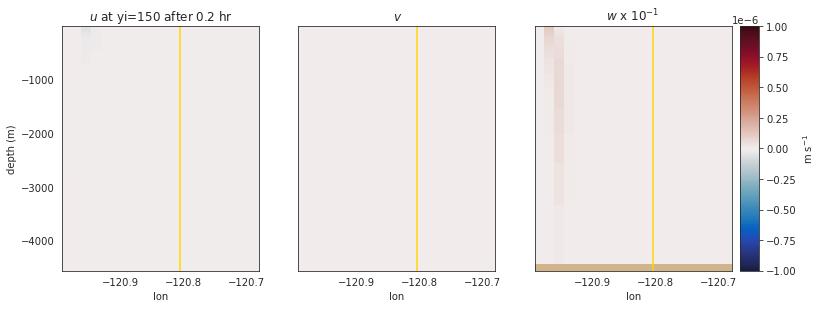

z,x indices: u[0,1]=2.370e-05, u[0,2]=3.397e-05, u[1,1]=1.560e-09, u[1,2]=-2.096e-08
z,x indices: v[0,0]=-4.177e-05, v[0,1]=-6.269e-05, v[1,0]=-3.536e-08, v[1,1]=-6.100e-08
z,x indices: w[0,0]=0.000e+00, w[0,1]=6.769e-11, w[1,0]=0.000e+00, w[1,1]=1.364e-08


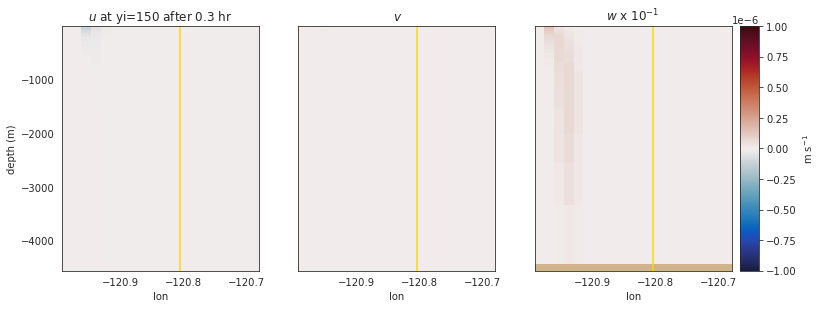

z,x indices: u[0,1]=7.043e-05, u[0,2]=8.316e-05, u[1,1]=6.486e-09, u[1,2]=-1.608e-09
z,x indices: v[0,0]=-1.322e-04, v[0,1]=-1.578e-04, v[1,0]=-1.677e-07, v[1,1]=-2.103e-07
z,x indices: w[0,0]=0.000e+00, w[0,1]=3.817e-10, w[1,0]=0.000e+00, w[1,1]=1.721e-08


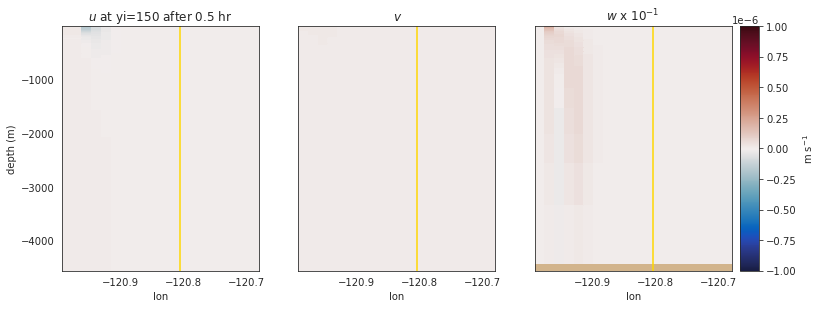

z,x indices: u[0,1]=1.546e-04, u[0,2]=1.709e-04, u[1,1]=2.894e-08, u[1,2]=1.105e-07
z,x indices: v[0,0]=-2.990e-04, v[0,1]=-3.325e-04, v[1,0]=-4.835e-07, v[1,1]=-5.570e-07
z,x indices: w[0,0]=0.000e+00, w[0,1]=4.534e-10, w[1,0]=0.000e+00, w[1,1]=2.199e-08


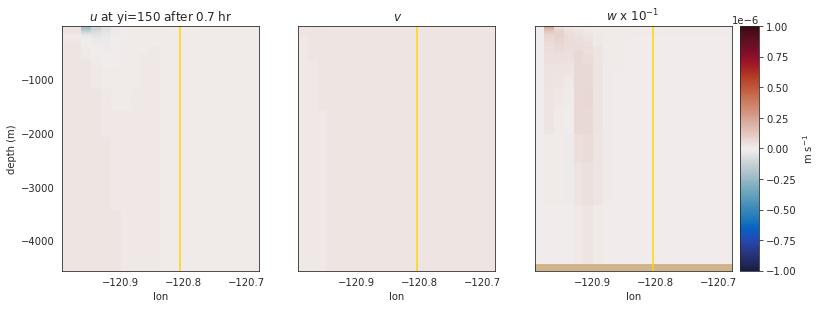

z,x indices: u[0,1]=2.762e-04, u[0,2]=2.960e-04, u[1,1]=1.404e-07, u[1,2]=3.433e-07
z,x indices: v[0,0]=-5.503e-04, v[0,1]=-5.924e-04, v[1,0]=-1.112e-06, v[1,1]=-1.228e-06
z,x indices: w[0,0]=0.000e+00, w[0,1]=6.956e-10, w[1,0]=0.000e+00, w[1,1]=2.694e-08


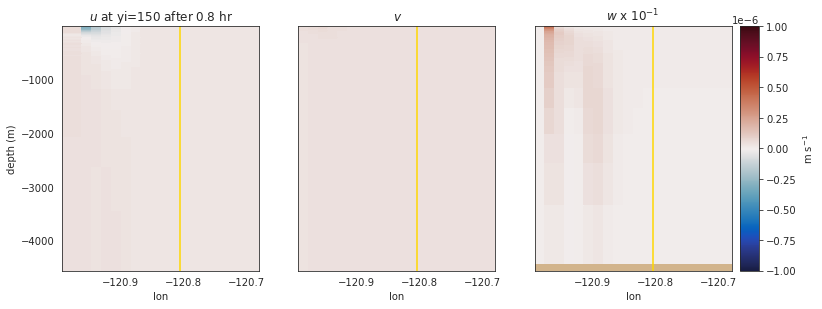

z,x indices: u[0,1]=4.750e-04, u[0,2]=5.083e-04, u[1,1]=4.430e-07, u[1,2]=7.529e-07
z,x indices: v[0,0]=-9.654e-04, v[0,1]=-1.035e-03, v[1,0]=-2.216e-06, v[1,1]=-2.399e-06
z,x indices: w[0,0]=0.000e+00, w[0,1]=8.279e-10, w[1,0]=0.000e+00, w[1,1]=4.486e-08


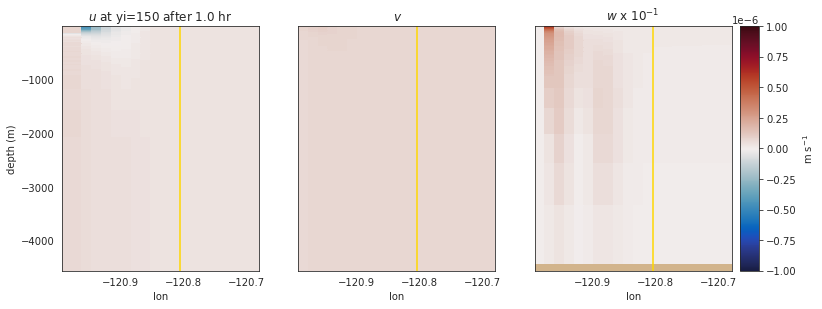

z,x indices: u[0,1]=8.121e-04, u[0,2]=8.595e-04, u[1,1]=1.028e-06, u[1,2]=1.440e-06
z,x indices: v[0,0]=-1.672e-03, v[0,1]=-1.774e-03, v[1,0]=-4.149e-06, v[1,1]=-4.444e-06
z,x indices: w[0,0]=0.000e+00, w[0,1]=1.407e-09, w[1,0]=0.000e+00, w[1,1]=6.430e-08


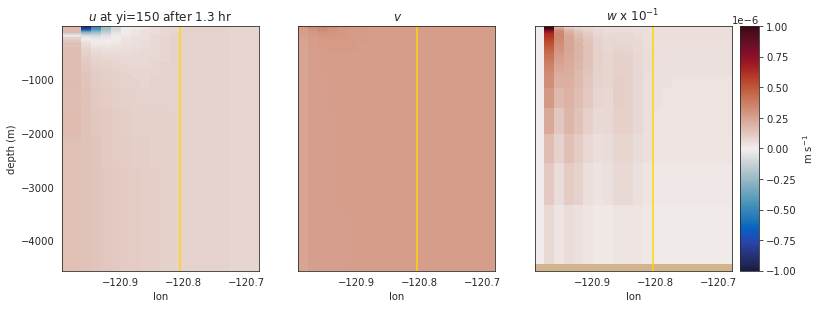

z,x indices: u[0,1]=1.982e-03, u[0,2]=2.078e-03, u[1,1]=3.565e-06, u[1,2]=4.290e-06
z,x indices: v[0,0]=-4.222e-03, v[0,1]=-4.432e-03, v[1,0]=-1.237e-05, v[1,1]=-1.305e-05
z,x indices: w[0,0]=0.000e+00, w[0,1]=4.174e-09, w[1,0]=0.000e+00, w[1,1]=1.316e-07


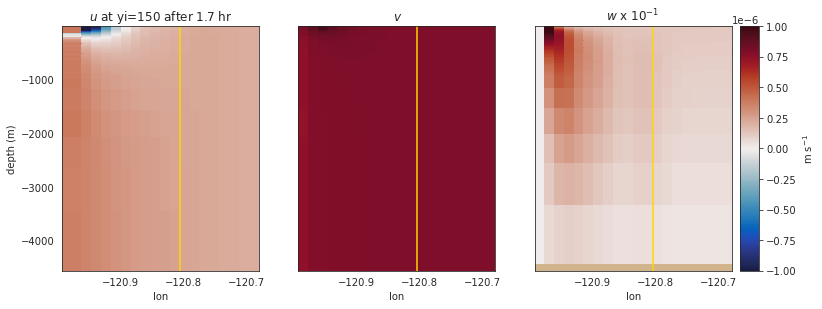

z,x indices: u[0,1]=4.474e-03, u[0,2]=4.643e-03, u[1,1]=9.487e-06, u[1,2]=1.084e-05
z,x indices: v[0,0]=-9.797e-03, v[0,1]=-1.019e-02, v[1,0]=-3.206e-05, v[1,1]=-3.356e-05
z,x indices: w[0,0]=0.000e+00, w[0,1]=1.108e-08, w[1,0]=0.000e+00, w[1,1]=2.351e-07


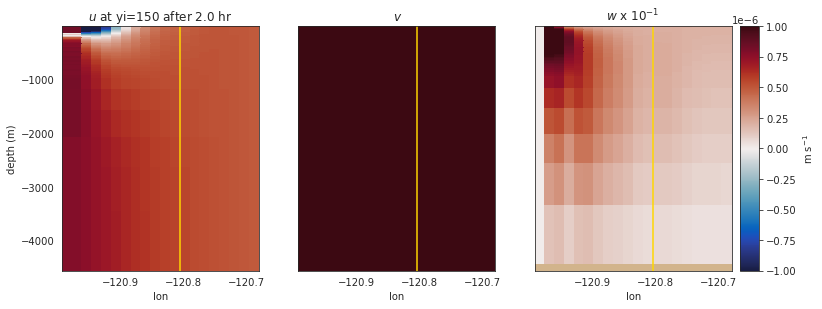

z,x indices: u[0,1]=9.031e-03, u[0,2]=9.336e-03, u[1,1]=2.173e-05, u[1,2]=2.412e-05
z,x indices: v[0,0]=-2.039e-02, v[0,1]=-2.111e-02, v[1,0]=-7.396e-05, v[1,1]=-7.695e-05
z,x indices: w[0,0]=0.000e+00, w[0,1]=1.683e-08, w[1,0]=0.000e+00, w[1,1]=4.229e-07


In [12]:
for yi in [150]:
    print('%1.1f N' %lat[yi])
    for ti in [0,1,2,3,4,5,6,8,10,12]:
        Wu = ds['UVEL'][ti,:,yi,:] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,yi,:]
        Ww = ds['WVEL'][ti,:,yi,:]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lon,Z, np.ma.masked_array(Wu, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax0.axvline(lon[12], color='gold')
        pc = ax1.pcolormesh(lon,Z, np.ma.masked_array(Wv, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax1.axvline(lon[12], color='gold')
       
        pc = ax2.pcolormesh(lon,Zl, np.ma.masked_array(Ww*1E1, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax2.axvline(lon[12], color='gold')
       
        norm = mpl.colors.Normalize(vmin=-1E-6, vmax=1E-6)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lon')
        ax1.set_xlabel('lon')
        ax2.set_xlabel('lon')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ at yi=%d after %1.1f hr' %(yi,(ti*600)/(3600)))
        ax1.set_title(' $v$ ' )
        ax2.set_title('$w$ x $10^{-1}$')
        ax0.set_xlim(lon[0],lon[20])
        plt.show()
        print('z,x indices: u[0,1]=%1.3e, u[0,2]=%1.3e, u[1,1]=%1.3e, u[1,2]=%1.3e' %(Wu[0,1], Wu[0,2],Wu[1,1], Wu[1,2]))
        print('z,x indices: v[0,0]=%1.3e, v[0,1]=%1.3e, v[1,0]=%1.3e, v[1,1]=%1.3e' %(Wv[0,0], Wv[0,1],Wv[1,0], Wv[1,1]))
        print('z,x indices: w[0,0]=%1.3e, w[0,1]=%1.3e, w[1,0]=%1.3e, w[1,1]=%1.3e' %(Ww[0,0], Ww[0,1],Ww[1,0], Ww[1,1]))

31.7 N


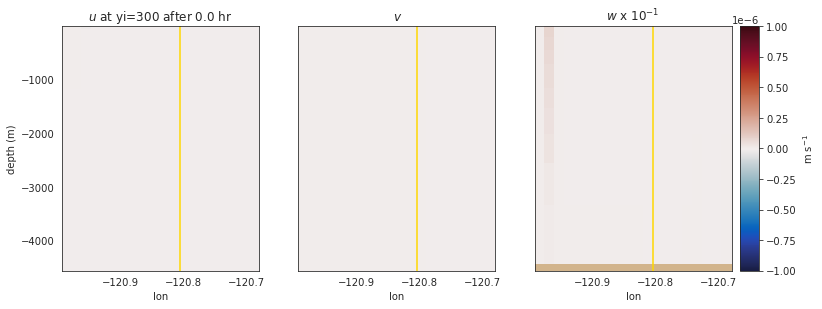

z,x indices: u[0,1]=2.018e-06, u[0,2]=8.618e-06, u[1,1]=1.320e-10, u[1,2]=-4.272e-09
z,x indices: v[0,0]=-3.592e-06, v[0,1]=-1.536e-05, v[1,0]=-1.386e-09, v[1,1]=-6.307e-09
z,x indices: w[0,0]=0.000e+00, w[0,1]=-2.212e-10, w[1,0]=0.000e+00, w[1,1]=8.710e-09


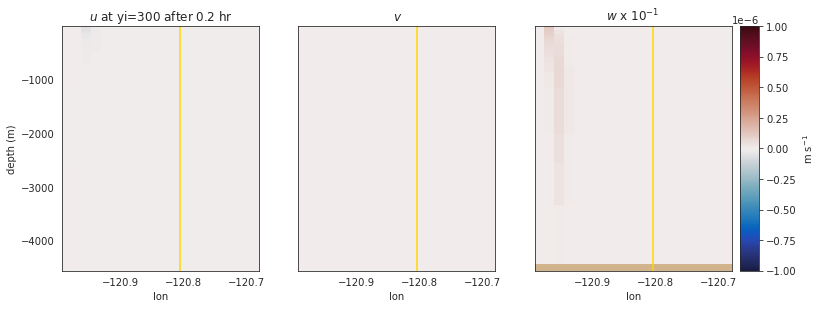

z,x indices: u[0,1]=2.361e-05, u[0,2]=3.382e-05, u[1,1]=1.560e-09, u[1,2]=-2.244e-08
z,x indices: v[0,0]=-4.349e-05, v[0,1]=-6.276e-05, v[1,0]=-3.809e-08, v[1,1]=-6.088e-08
z,x indices: w[0,0]=0.000e+00, w[0,1]=7.954e-13, w[1,0]=0.000e+00, w[1,1]=1.383e-08


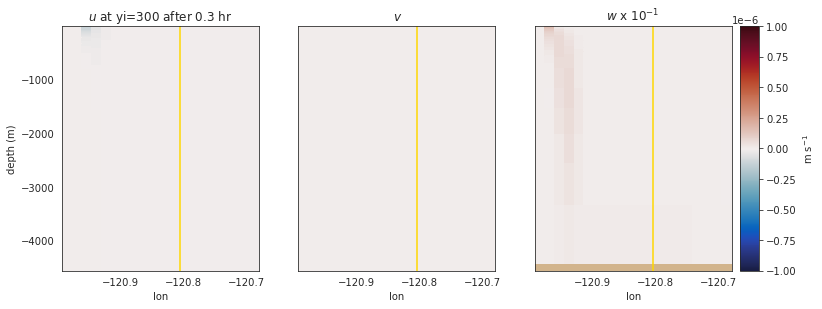

z,x indices: u[0,1]=7.004e-05, u[0,2]=8.267e-05, u[1,1]=6.440e-09, u[1,2]=-4.578e-09
z,x indices: v[0,0]=-1.333e-04, v[0,1]=-1.580e-04, v[1,0]=-1.725e-07, v[1,1]=-2.134e-07
z,x indices: w[0,0]=0.000e+00, w[0,1]=3.721e-11, w[1,0]=0.000e+00, w[1,1]=1.716e-08


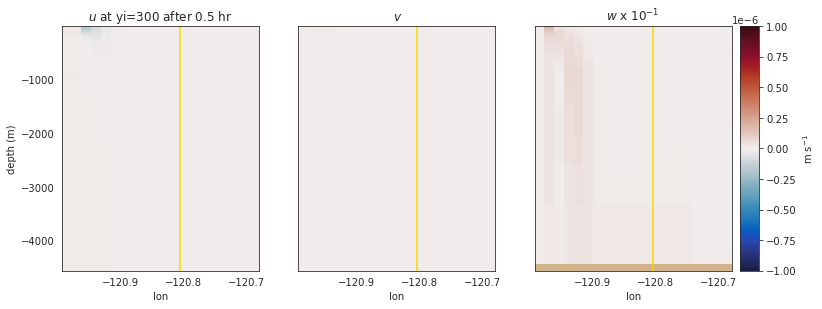

z,x indices: u[0,1]=1.535e-04, u[0,2]=1.696e-04, u[1,1]=2.767e-08, u[1,2]=1.050e-07
z,x indices: v[0,0]=-3.001e-04, v[0,1]=-3.330e-04, v[1,0]=-4.939e-07, v[1,1]=-5.654e-07
z,x indices: w[0,0]=0.000e+00, w[0,1]=1.260e-10, w[1,0]=0.000e+00, w[1,1]=2.199e-08


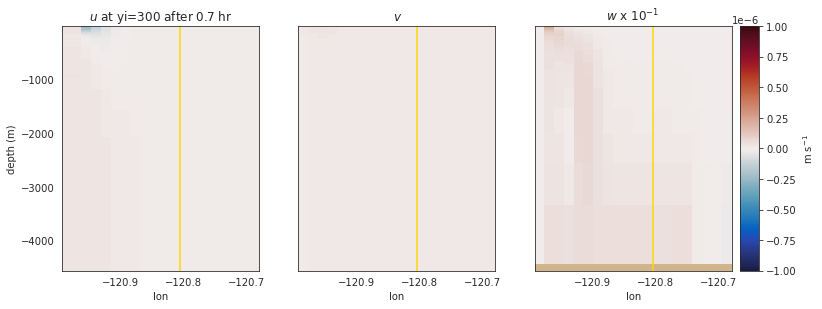

z,x indices: u[0,1]=2.737e-04, u[0,2]=2.933e-04, u[1,1]=1.347e-07, u[1,2]=3.325e-07
z,x indices: v[0,0]=-5.518e-04, v[0,1]=-5.935e-04, v[1,0]=-1.122e-06, v[1,1]=-1.235e-06
z,x indices: w[0,0]=0.000e+00, w[0,1]=1.810e-10, w[1,0]=0.000e+00, w[1,1]=2.675e-08


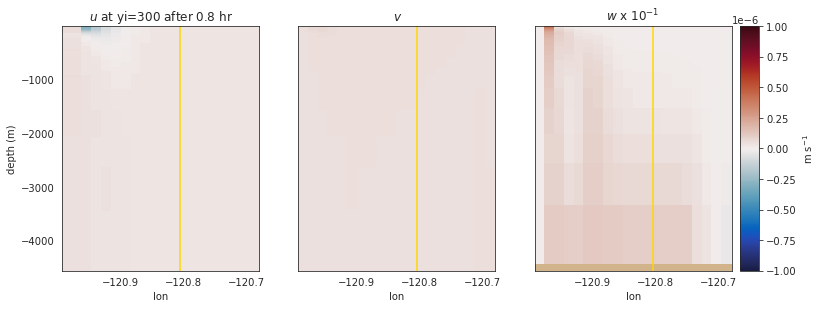

z,x indices: u[0,1]=4.702e-04, u[0,2]=5.030e-04, u[1,1]=4.270e-07, u[1,2]=7.299e-07
z,x indices: v[0,0]=-9.678e-04, v[0,1]=-1.037e-03, v[1,0]=-2.218e-06, v[1,1]=-2.397e-06
z,x indices: w[0,0]=0.000e+00, w[0,1]=-2.268e-10, w[1,0]=0.000e+00, w[1,1]=4.437e-08


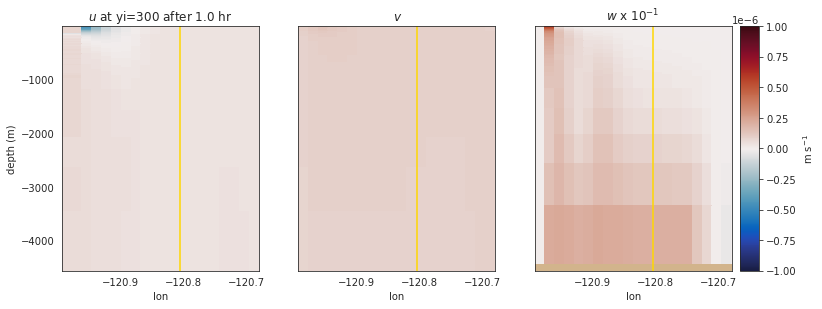

z,x indices: u[0,1]=8.031e-04, u[0,2]=8.499e-04, u[1,1]=9.909e-07, u[1,2]=1.394e-06
z,x indices: v[0,0]=-1.676e-03, v[0,1]=-1.777e-03, v[1,0]=-4.137e-06, v[1,1]=-4.428e-06
z,x indices: w[0,0]=0.000e+00, w[0,1]=-7.505e-10, w[1,0]=0.000e+00, w[1,1]=6.286e-08


In [13]:
for yi in [300]:
    print('%1.1f N' %lat[yi])
    for ti in [0,1,2,3,4,5,6]:
        Wu = ds['UVEL'][ti,:,yi,:] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,yi,:]
        Ww = ds['WVEL'][ti,:,yi,:]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lon,Z, np.ma.masked_array(Wu, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax0.axvline(lon[12], color='gold')
        pc = ax1.pcolormesh(lon,Z, np.ma.masked_array(Wv, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax1.axvline(lon[12], color='gold')
       
        pc = ax2.pcolormesh(lon,Zl, np.ma.masked_array(Ww*1E1, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax2.axvline(lon[12], color='gold')
       
        norm = mpl.colors.Normalize(vmin=-1E-6, vmax=1E-6)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lon')
        ax1.set_xlabel('lon')
        ax2.set_xlabel('lon')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ at yi=%d after %1.1f hr' %(yi,(ti*600)/(3600)))
        ax1.set_title(' $v$ ' )
        ax2.set_title('$w$ x $10^{-1}$')
        ax0.set_xlim(lon[0],lon[20])
        plt.show()
        print('z,x indices: u[0,1]=%1.3e, u[0,2]=%1.3e, u[1,1]=%1.3e, u[1,2]=%1.3e' %(Wu[0,1], Wu[0,2],Wu[1,1], Wu[1,2]))
        print('z,x indices: v[0,0]=%1.3e, v[0,1]=%1.3e, v[1,0]=%1.3e, v[1,1]=%1.3e' %(Wv[0,0], Wv[0,1],Wv[1,0], Wv[1,1]))
        print('z,x indices: w[0,0]=%1.3e, w[0,1]=%1.3e, w[1,0]=%1.3e, w[1,1]=%1.3e' %(Ww[0,0], Ww[0,1],Ww[1,0], Ww[1,1]))

29.4 N


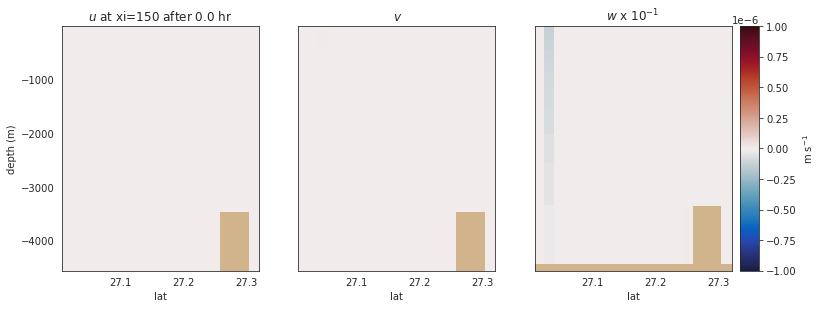

z,y indices: u[0,0]=6.210e-07, u[0,1]=8.743e-06, u[1,0]=6.941e-10, u[1,1]=3.241e-09
z,y indices: v[0,1]=-3.604e-06, v[0,2]=-1.542e-05, v[1,1]=1.320e-10, v[1,2]=5.465e-09
z,y indices: w[0,0]=0.000e+00, w[0,1]=4.241e-10, w[1,0]=0.000e+00, w[1,1]=-1.317e-08


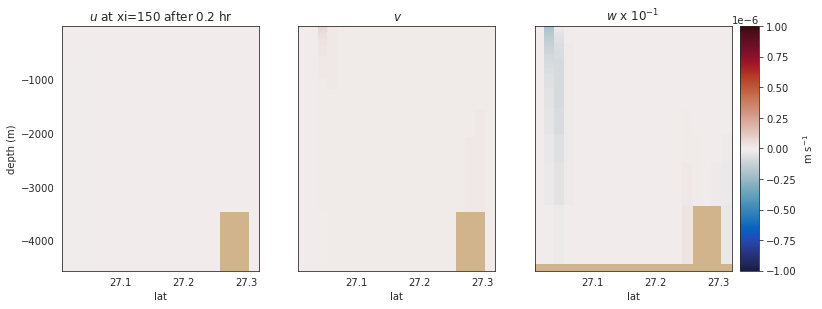

z,y indices: u[0,0]=5.263e-06, u[0,1]=3.448e-05, u[1,0]=1.743e-08, u[1,1]=3.475e-08
z,y indices: v[0,1]=-4.365e-05, v[0,2]=-6.297e-05, v[1,1]=1.561e-09, v[1,2]=2.260e-08
z,y indices: w[0,0]=0.000e+00, w[0,1]=1.376e-10, w[1,0]=0.000e+00, w[1,1]=-2.209e-08


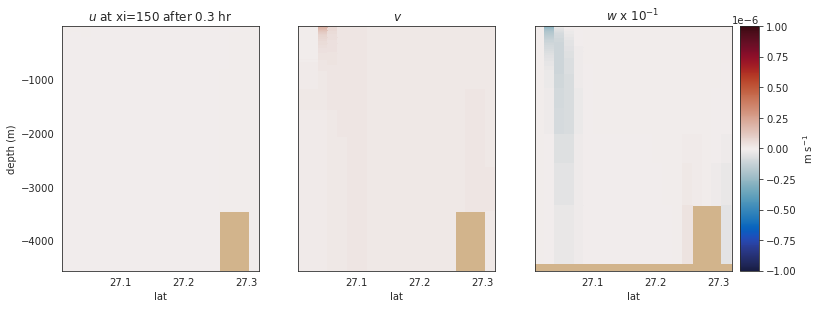

z,y indices: u[0,0]=4.828e-05, u[0,1]=8.406e-05, u[1,0]=6.515e-08, u[1,1]=1.160e-07
z,y indices: v[0,1]=-1.335e-04, v[0,2]=-1.582e-04, v[1,1]=5.905e-09, v[1,2]=-2.213e-08
z,y indices: w[0,0]=0.000e+00, w[0,1]=3.142e-10, w[1,0]=0.000e+00, w[1,1]=-2.812e-08


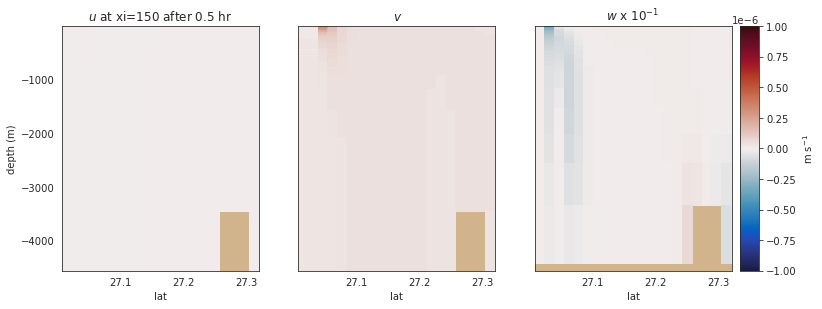

z,y indices: u[0,0]=1.467e-04, u[0,1]=1.729e-04, u[1,0]=1.638e-07, u[1,1]=2.990e-07
z,y indices: v[0,1]=-3.001e-04, v[0,2]=-3.329e-04, v[1,1]=-2.465e-08, v[1,2]=-2.548e-07
z,y indices: w[0,0]=0.000e+00, w[0,1]=8.437e-10, w[1,0]=0.000e+00, w[1,1]=-3.685e-08


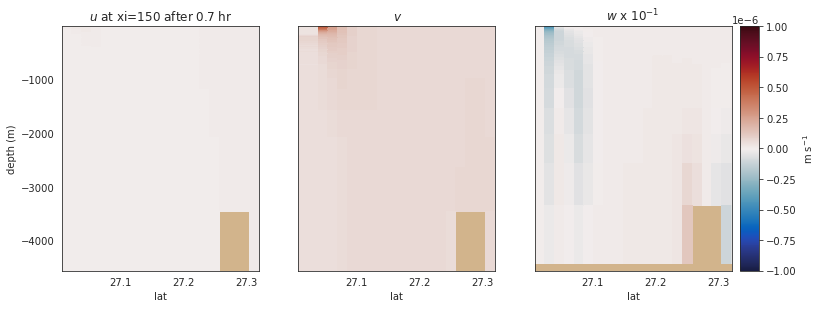

z,y indices: u[0,0]=2.731e-04, u[0,1]=3.003e-04, u[1,0]=3.388e-07, u[1,1]=6.354e-07
z,y indices: v[0,1]=-5.511e-04, v[0,2]=-5.927e-04, v[1,1]=-2.805e-07, v[1,2]=-7.767e-07
z,y indices: w[0,0]=0.000e+00, w[0,1]=1.480e-09, w[1,0]=0.000e+00, w[1,1]=-4.623e-08


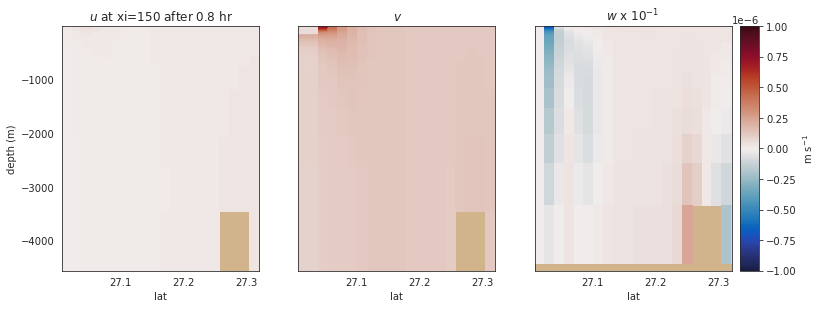

z,y indices: u[0,0]=4.564e-04, u[0,1]=5.161e-04, u[1,0]=6.039e-07, u[1,1]=1.190e-06
z,y indices: v[0,1]=-9.658e-04, v[0,2]=-1.035e-03, v[1,1]=-1.018e-06, v[1,2]=-1.728e-06
z,y indices: w[0,0]=0.000e+00, w[0,1]=3.384e-09, w[1,0]=0.000e+00, w[1,1]=-7.585e-08


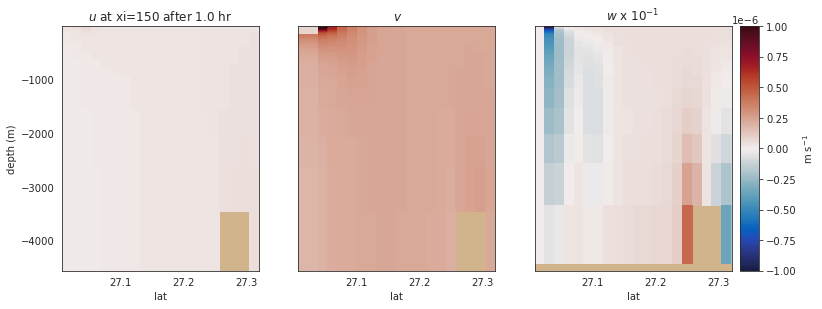

z,y indices: u[0,0]=7.540e-04, u[0,1]=8.730e-04, u[1,0]=9.860e-07, u[1,1]=2.118e-06
z,y indices: v[0,1]=-1.672e-03, v[0,2]=-1.773e-03, v[1,1]=-2.476e-06, v[1,2]=-3.410e-06
z,y indices: w[0,0]=0.000e+00, w[0,1]=5.301e-09, w[1,0]=0.000e+00, w[1,1]=-1.102e-07


In [14]:
for xi in [150]:
    print('%1.1f N' %lat[xi])
    for ti in [0,1,2,3,4,5,6]:
        Wu = ds['UVEL'][ti,:,:,xi] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,:,xi]
        Ww = ds['WVEL'][ti,:,:,xi]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lat,Z, np.ma.masked_array(Wu, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax0.axvline(lon[12], color='gold')
        pc = ax1.pcolormesh(lat,Z, np.ma.masked_array(Wv, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax1.axvline(lon[12], color='gold')
       
        pc = ax2.pcolormesh(lat,Zl, np.ma.masked_array(Ww*1E1, mask = mask[:,:,xi]),
                       cmap=cmo.cm.balance, vmin=-1E-6, vmax=1E-6)
        ax2.axvline(lon[12], color='gold')
       
        norm = mpl.colors.Normalize(vmin=-1E-6, vmax=1E-6)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lat')
        ax1.set_xlabel('lat')
        ax2.set_xlabel('lat')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ at xi=%d after %1.1f hr' %(xi,(ti*600)/(3600)))
        ax1.set_title(' $v$ ' )
        ax2.set_title('$w$ x $10^{-1}$')
        ax0.set_xlim(lat[0],lat[20])
        plt.show()
        print('z,y indices: u[0,0]=%1.3e, u[0,1]=%1.3e, u[1,0]=%1.3e, u[1,1]=%1.3e' %(Wu[0,0], Wu[0,1],Wu[1,0], Wu[1,1]))
        print('z,y indices: v[0,1]=%1.3e, v[0,2]=%1.3e, v[1,1]=%1.3e, v[1,2]=%1.3e' %(Wv[0,1], Wv[0,2],Wv[1,1], Wv[1,2]))
        print('z,y indices: w[0,0]=%1.3e, w[0,1]=%1.3e, w[1,0]=%1.3e, w[1,1]=%1.3e' %(Ww[0,0], Ww[0,1],Ww[1,0], Ww[1,1]))

29.4 N


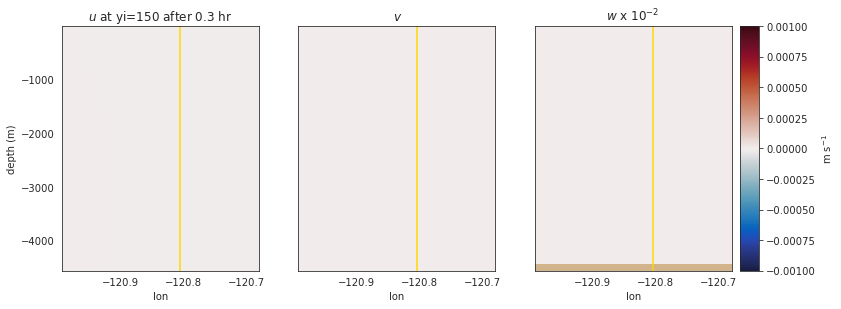

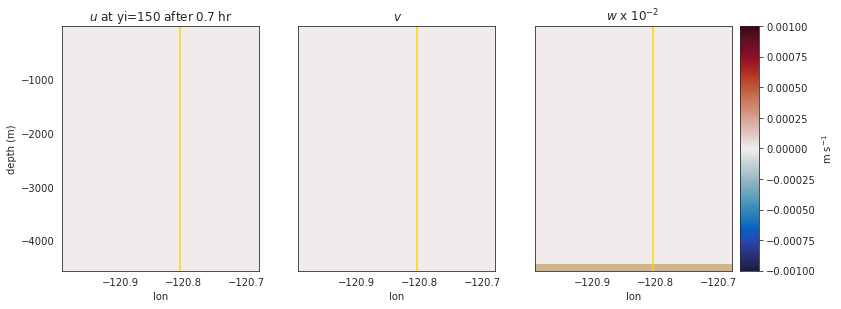

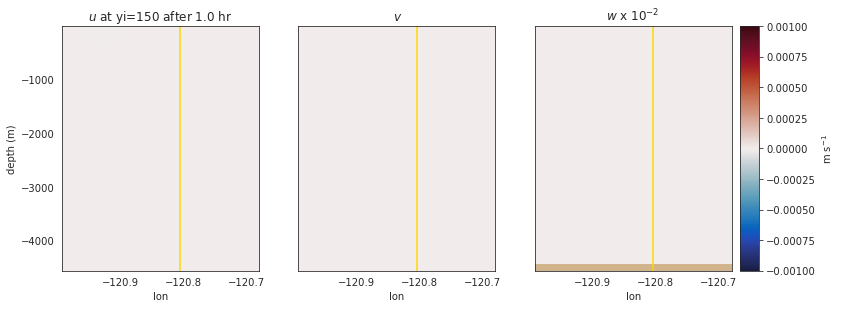

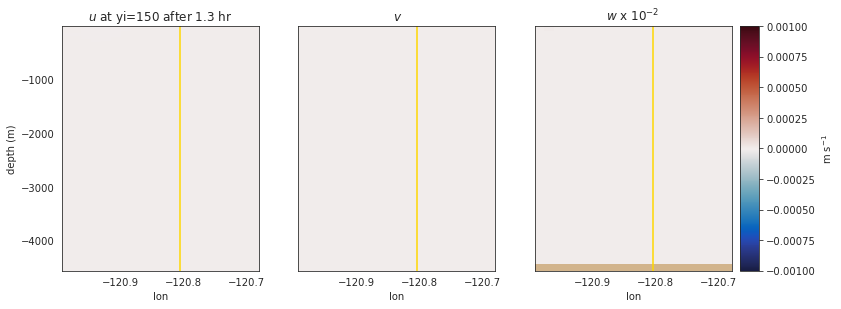

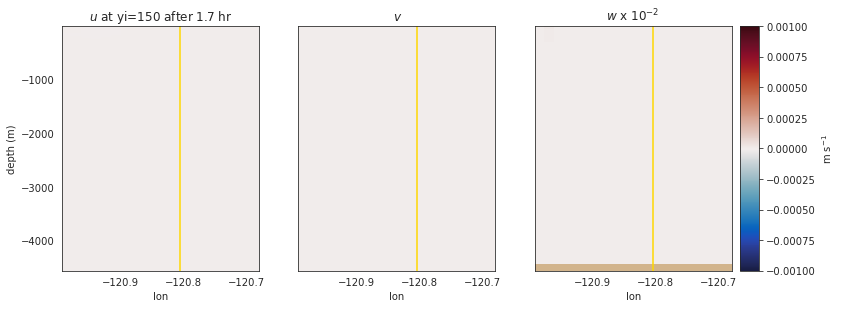

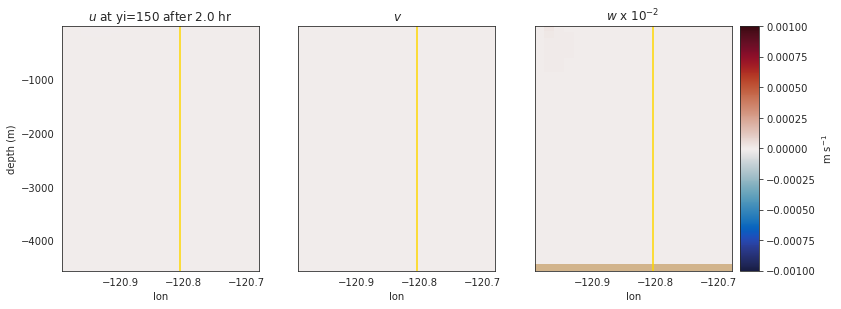

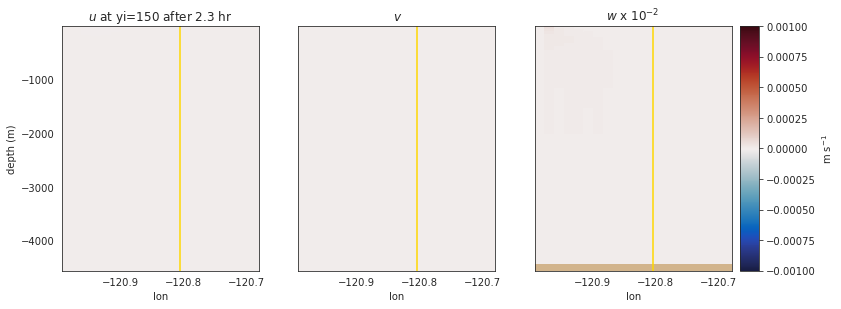

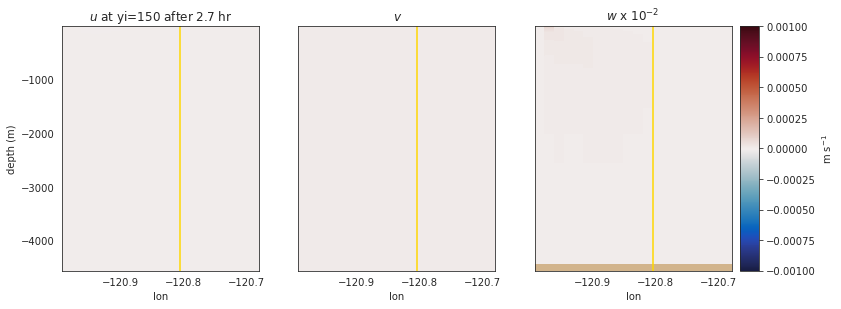

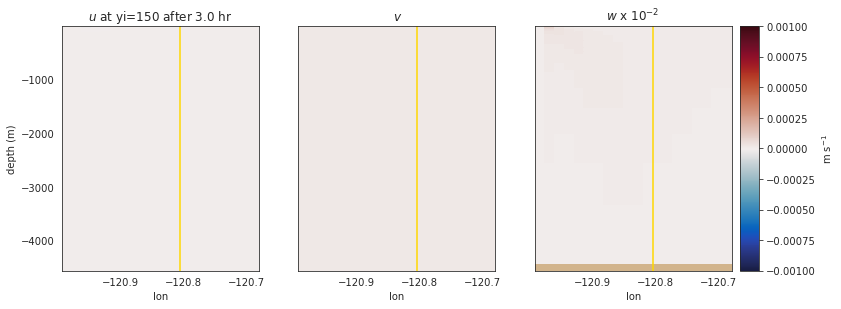

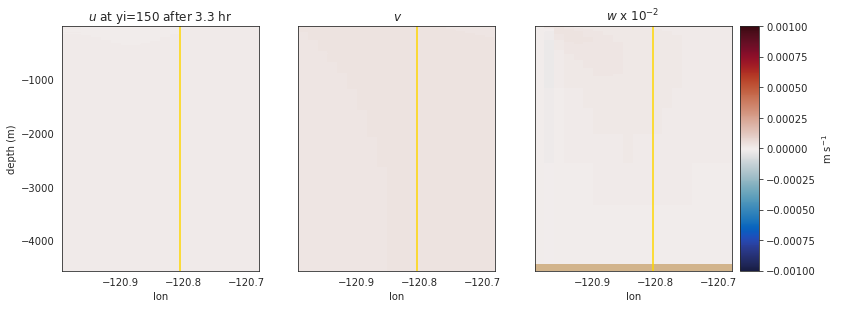

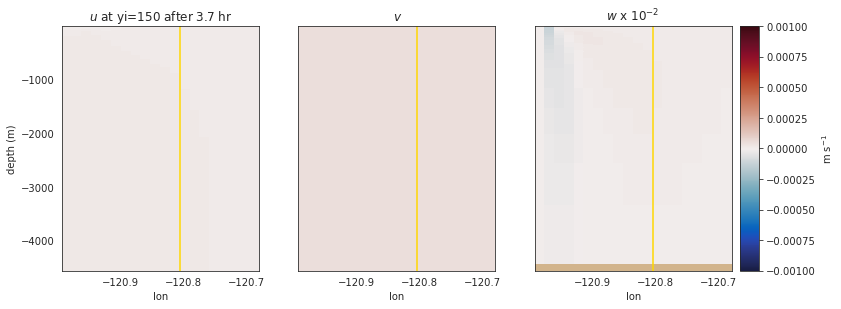

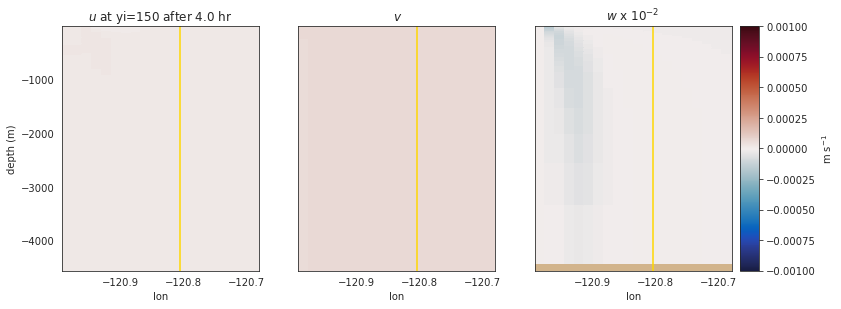

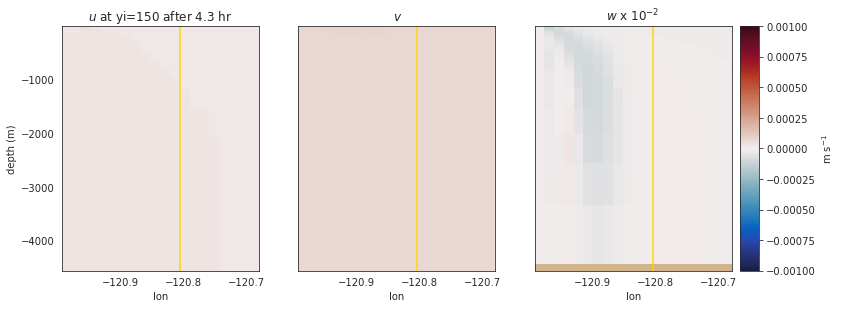

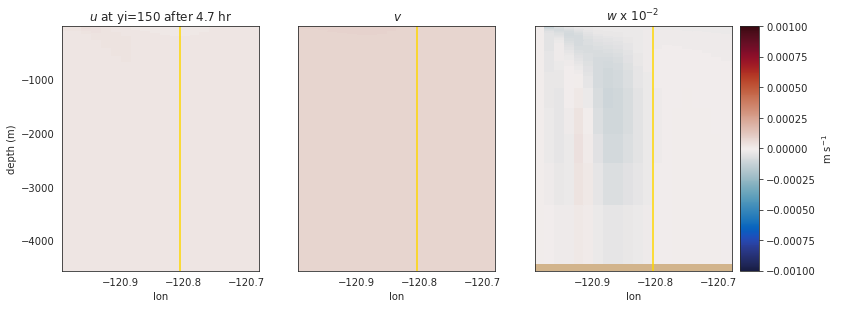

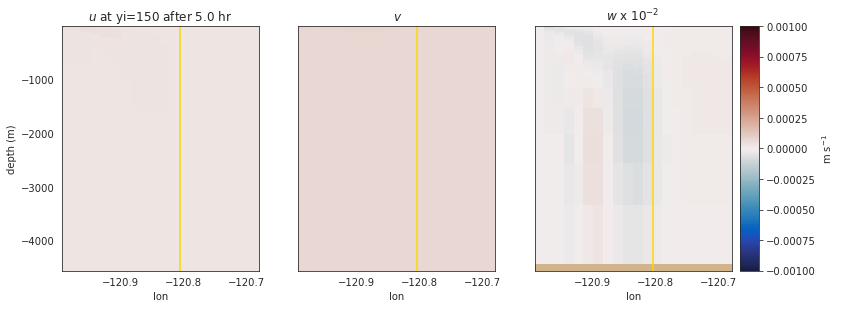

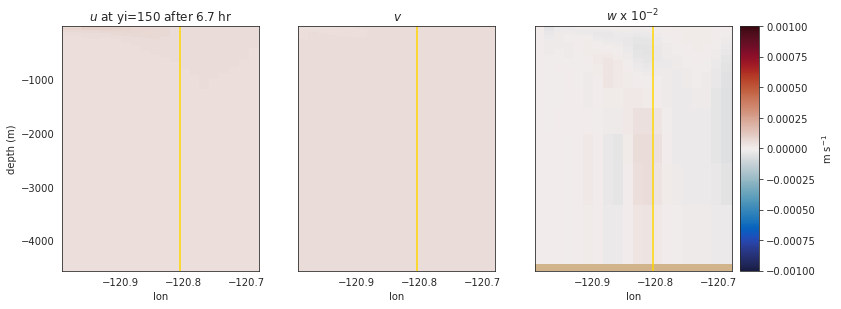

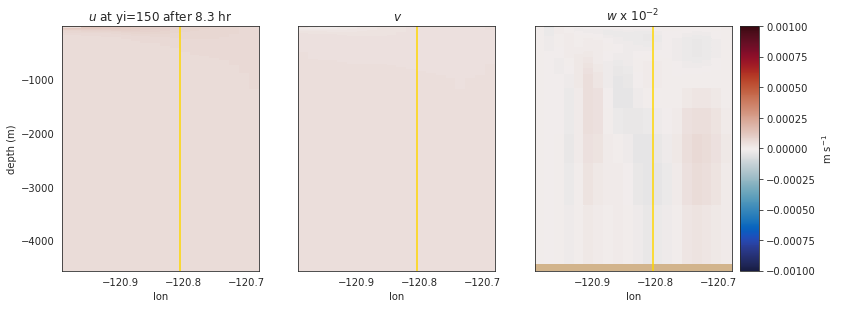

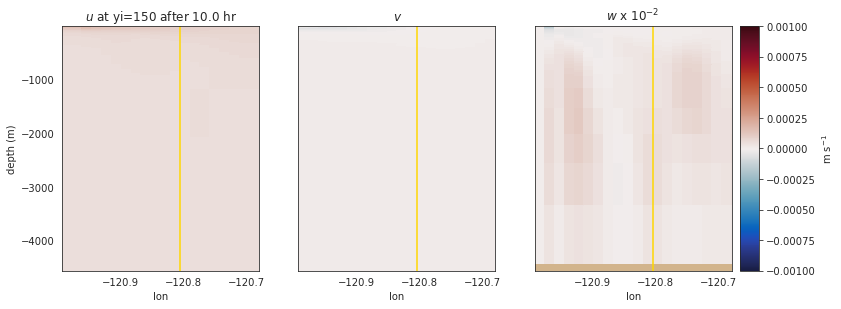

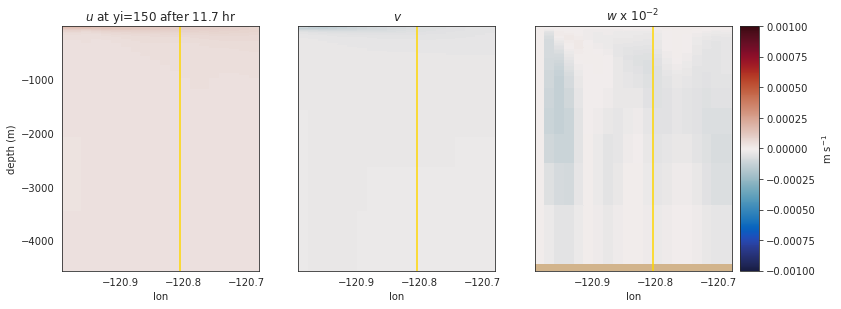

In [15]:
for yi in [150]:
    print('%1.1f N' %lat[yi])
    for ti in [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,40,50,60,70]:
        Wu = ds['UVEL'][ti,:,yi,:] # Remember these are 10 min averages, not snapshots
        Wv = ds['VVEL'][ti,:,yi,:]
        Ww = ds['WVEL'][ti,:,yi,:]

        fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4.5), sharey=True, sharex=True)
        ax0.set_facecolor('tan')
        ax1.set_facecolor('tan')
        ax2.set_facecolor('tan')

        pc = ax0.pcolormesh(lon,Z, np.ma.masked_array(Wu, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-3, vmax=1E-3)
        ax0.axvline(lon[12], color='gold')
        pc = ax1.pcolormesh(lon,Z, np.ma.masked_array(Wv, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-3, vmax=1E-3)
        ax1.axvline(lon[12], color='gold')
       
        pc = ax2.pcolormesh(lon,Zl, np.ma.masked_array(Ww*1E2, mask = mask[:,yi,:]),
                       cmap=cmo.cm.balance, vmin=-1E-3, vmax=1E-3)
        ax2.axvline(lon[12], color='gold')
       
        norm = mpl.colors.Normalize(vmin=-1E-3, vmax=1E-3)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

        ax0.set_xlabel('lon')
        ax1.set_xlabel('lon')
        ax2.set_xlabel('lon')
        ax0.set_ylabel('depth (m)')

        ax0.set_title(r'$u$ at yi=%d after %1.1f hr' %(yi,(ti*600)/(3600)))
        ax1.set_title(' $v$ ' )
        ax2.set_title('$w$ x $10^{-2}$')
        ax0.set_xlim(lon[0],lon[20])
        plt.show()

29.4 N


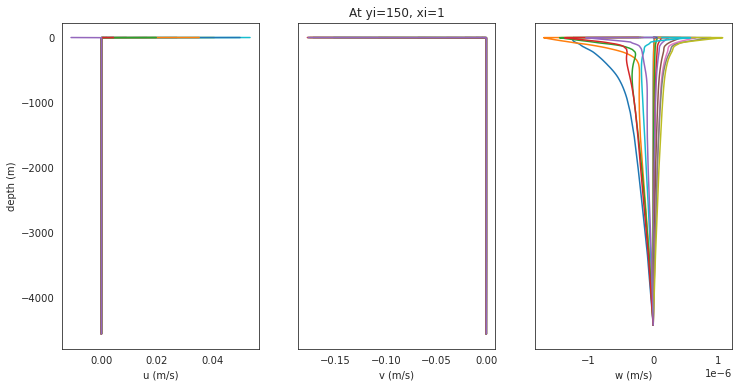

In [16]:
yi = 150
xi = 1

fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,6), sharey=True)
print('%1.1f N' %lat[yi])
for ti in [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]:
    Wu = ds['UVEL'][ti,:,yi,xi] # Remember these are 10 min averages, not snapshots
    Wv = ds['VVEL'][ti,:,yi,xi]
    Ww = ds['WVEL'][ti,:,yi,xi]

    pc = ax0.plot(Wu,Z)
    pc = ax1.plot(Wv,Z)
    pc = ax2.plot(Ww,Zl)

    ax0.set_xlabel('u (m/s)')
    ax1.set_xlabel('v (m/s)')
    ax2.set_xlabel('w (m/s)')
    ax0.set_ylabel('depth (m)')

    ax1.set_title(r'At yi=%d, xi=%d' %(yi,xi))
plt.show()

29.4 N


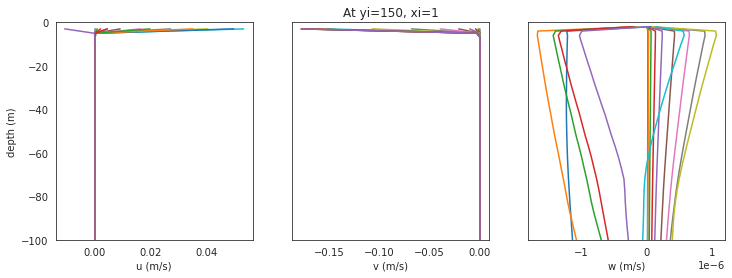

In [17]:
yi = 150
xi = 1

fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4), sharey=True)
print('%1.1f N' %lat[yi])
for ti in [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]:
    Wu = ds['UVEL'][ti,:,yi,xi] # Remember these are 10 min averages, not snapshots
    Wv = ds['VVEL'][ti,:,yi,xi]
    Ww = ds['WVEL'][ti,:,yi,xi]

    pc = ax0.plot(Wu,Z)
    pc = ax1.plot(Wv,Z)
    pc = ax2.plot(Ww,Zl)

    ax0.set_xlabel('u (m/s)')
    ax1.set_xlabel('v (m/s)')
    ax2.set_xlabel('w (m/s)')
    ax0.set_ylabel('depth (m)')
    ax0.set_ylim(-100,0)
    ax1.set_title(r'At yi=%d, xi=%d' %(yi,xi))
plt.show()

29.4 N


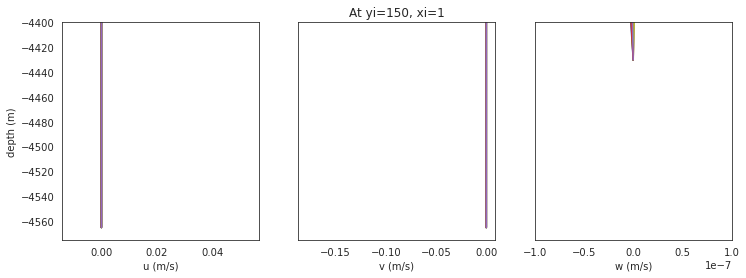

In [18]:
yi = 150
xi = 1

fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(12,4), sharey=True)
print('%1.1f N' %lat[yi])
for ti in [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]:
    Wu = ds['UVEL'][ti,:,yi,xi] # Remember these are 10 min averages, not snapshots
    Wv = ds['VVEL'][ti,:,yi,xi]
    Ww = ds['WVEL'][ti,:,yi,xi]

    pc = ax0.plot(Wu,Z)
    pc = ax1.plot(Wv,Z)
    pc = ax2.plot(Ww,Zl)

    ax0.set_xlabel('u (m/s)')
    ax1.set_xlabel('v (m/s)')
    ax2.set_xlabel('w (m/s)')
    ax0.set_ylabel('depth (m)')
    ax0.set_ylim(-4575,-4400)
    ax2.set_xlim(-0.01E-5,0.01E-5)
    ax1.set_title(r'At yi=%d, xi=%d' %(yi,xi))
plt.show()

### Hovmöller diagrams of N-S and E-W cross-sections surface(ish)

29.4 N


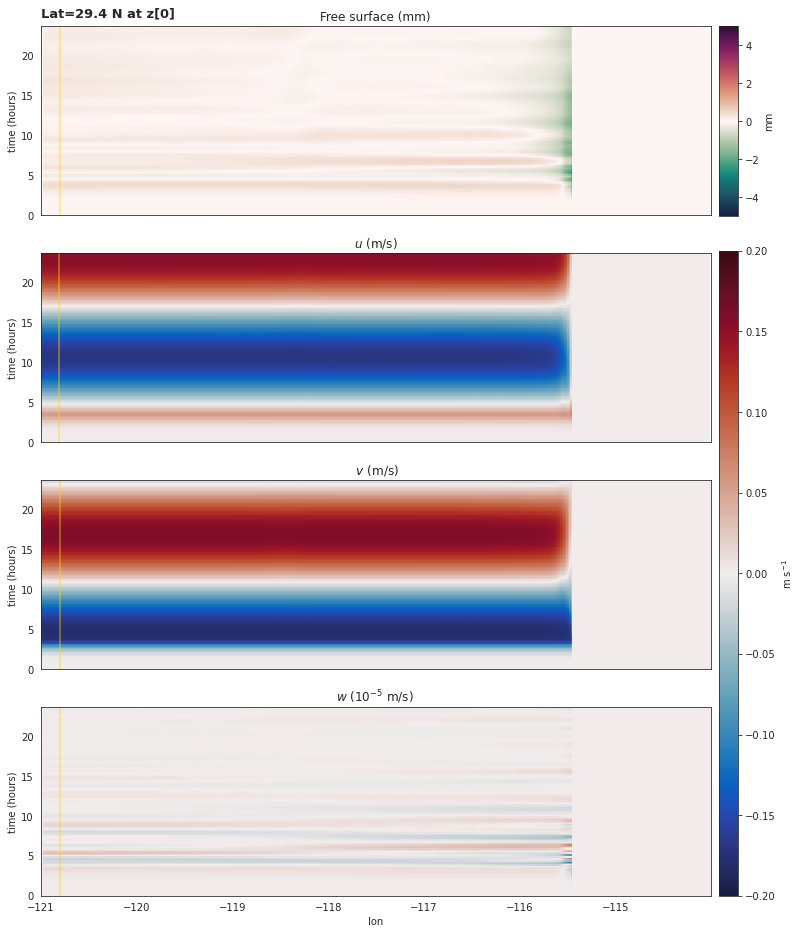

In [26]:
yi = 150
zi = 0
tf = 143
print('%1.1f N' %lat[yi])

Wu = ds['UVEL'][:tf,zi,yi,:] 
Wv = ds['VVEL'][:tf,zi,yi,:]
Ww = ds['WVEL'][:tf,zi,yi,:]
eta = ds['ETAN'][:tf,yi,:]

fig, (ax3,ax0,ax1,ax2) = plt.subplots(4,1,figsize=(12,16), sharey=True, sharex=True)

pc = ax3.pcolormesh(lon,time[:tf]/(3600), eta*1E3,
               cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax3.axvline(lon[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(lonx,time[:tf]/(3600), Wu,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axvline(lonx[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(lon,time[:tf]/(3600), Wv,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axvline(lon[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(lon,time[:tf]/(3600), Ww*1E5,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axvline(lon[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.56])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.91, 0.715, 0.022, 0.165])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='vertical',label='mm',)

ax2.set_xlabel('lon')
ax0.set_ylabel('time (hours)')
ax1.set_ylabel('time (hours)')
ax2.set_ylabel('time (hours)')
ax3.set_ylabel('time (hours)')

ax0.set_title(r'$u$ (m/s)')
ax1.set_title(' $v$ (m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax3.set_title(r'Free surface (mm)')
plt.text(0,1.05,'Lat=%1.1f N at z[%d]' %(lat[yi],zi),transform=ax3.transAxes, fontweight='bold', fontsize=13)

plt.show()

29.4 N


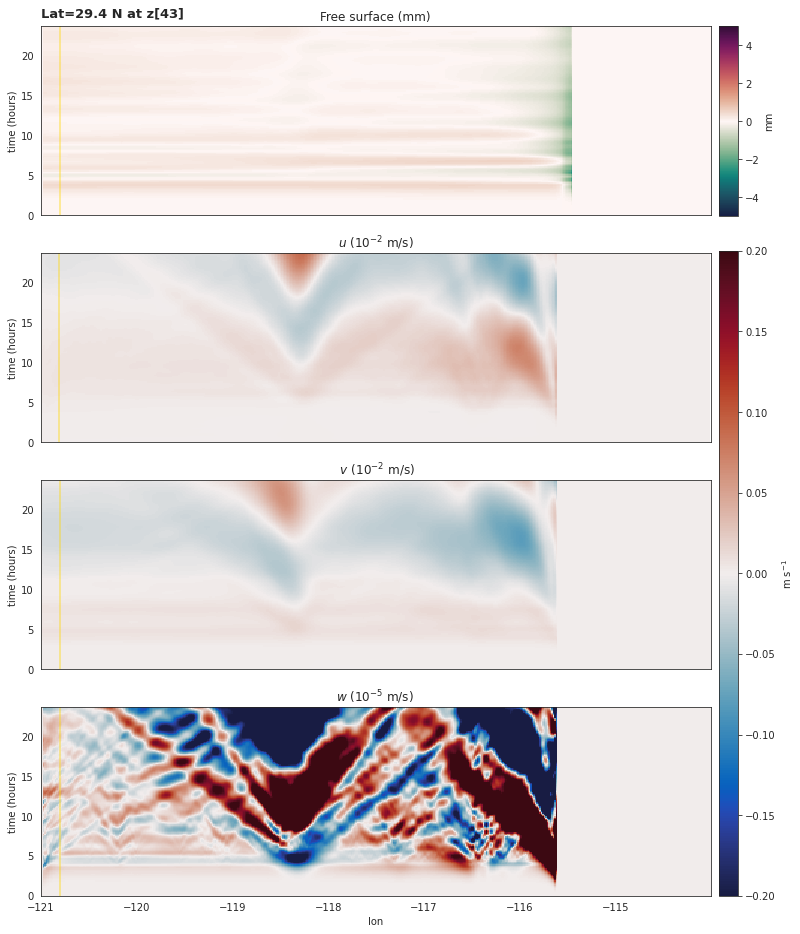

In [76]:
yi = 150
zi = 43
tf = 143
print('%1.1f N' %lat[yi])

Wu = ds['UVEL'][:tf,zi,yi,:] 
Wv = ds['VVEL'][:tf,zi,yi,:]
Ww = ds['WVEL'][:tf,zi,yi,:]
eta = ds['ETAN'][:tf,yi,:]

fig, (ax3,ax0,ax1,ax2) = plt.subplots(4,1,figsize=(12,16), sharey=True, sharex=True)

pc = ax3.pcolormesh(lon,time[:tf]/(3600), eta*1E3,
               cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax3.axvline(lon[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(lonx,time[:tf]/(3600), Wu*1E2,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axvline(lonx[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(lon,time[:tf]/(3600), Wv*1E2,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axvline(lon[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(lon,time[:tf]/(3600), Ww*1E5,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axvline(lon[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.56])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.91, 0.715, 0.022, 0.165])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='vertical',label='mm',)

ax2.set_xlabel('lon')
ax0.set_ylabel('time (hours)')
ax1.set_ylabel('time (hours)')
ax2.set_ylabel('time (hours)')
ax3.set_ylabel('time (hours)')

ax0.set_title(r'$u$ (10$^{-2}$ m/s)')
ax1.set_title(' $v$ (10$^{-2}$ m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax3.set_title(r'Free surface (mm)')
plt.text(0,1.05,'Lat=%1.1f N at z[%d]' %(lat[yi],zi),transform=ax3.transAxes, fontweight='bold', fontsize=13)

plt.show()

27.2 N


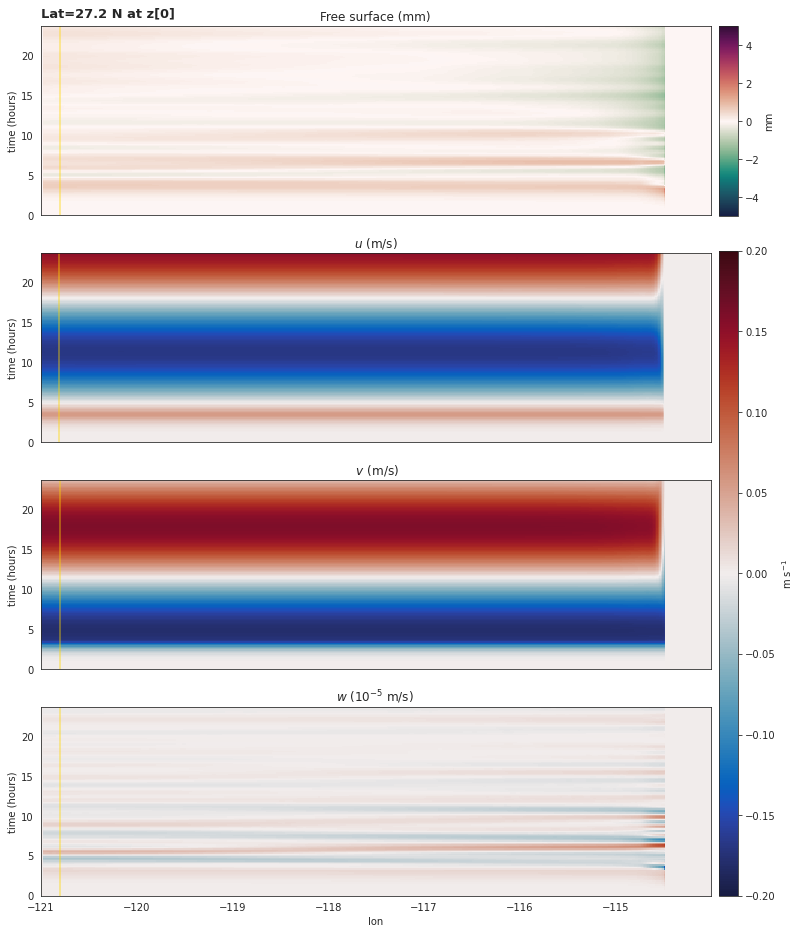

In [29]:
yi = 14
zi = 0
tf = 143
print('%1.1f N' %lat[yi])

Wu = ds['UVEL'][:tf,zi,yi,:] 
Wv = ds['VVEL'][:tf,zi,yi,:]
Ww = ds['WVEL'][:tf,zi,yi,:]
eta = ds['ETAN'][:tf,yi,:]

fig, (ax3,ax0,ax1,ax2) = plt.subplots(4,1,figsize=(12,16), sharey=True, sharex=True)

pc = ax3.pcolormesh(lon,time[:tf]/(3600), eta*1E3,
               cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax3.axvline(lon[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(lonx,time[:tf]/(3600), Wu,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axvline(lonx[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(lon,time[:tf]/(3600), Wv,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axvline(lon[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(lon,time[:tf]/(3600), Ww*1E5,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axvline(lon[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.56])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.91, 0.715, 0.022, 0.165])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='vertical',label='mm',)

ax2.set_xlabel('lon')
ax0.set_ylabel('time (hours)')
ax1.set_ylabel('time (hours)')
ax2.set_ylabel('time (hours)')
ax3.set_ylabel('time (hours)')

ax0.set_title(r'$u$ (m/s)')
ax1.set_title(' $v$ (m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax3.set_title(r'Free surface (mm)')
plt.text(0,1.05,'Lat=%1.1f N at z[%d]' %(lat[yi],zi),transform=ax3.transAxes, fontweight='bold', fontsize=13)

plt.show()

27.0 N


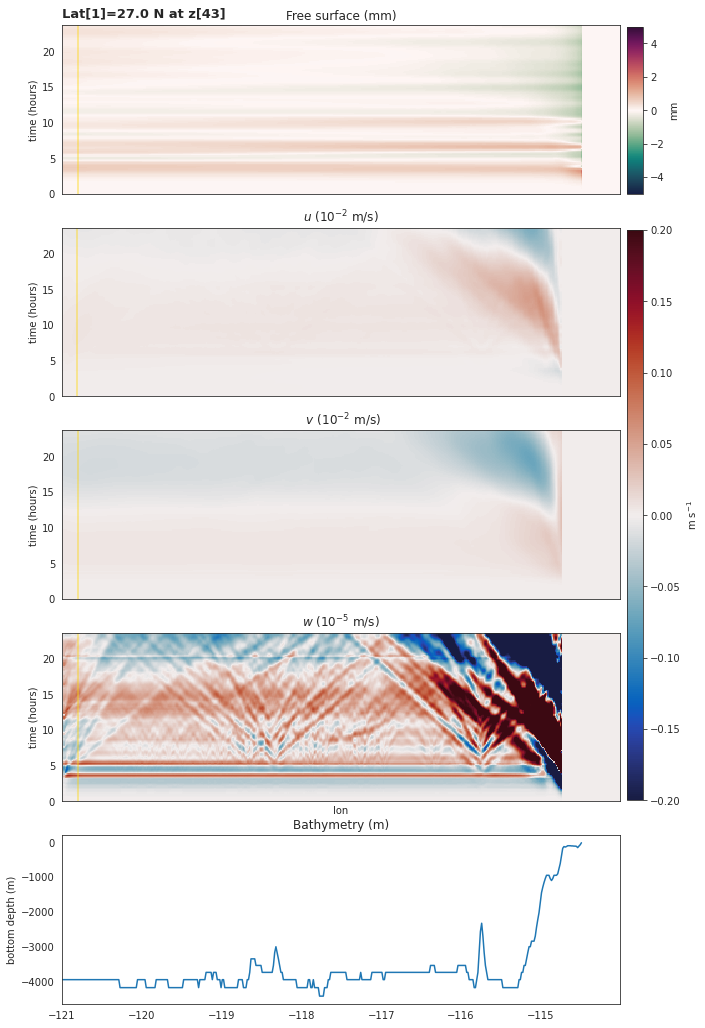

In [70]:
yi = 1
zi = 43
tf = 143
print('%1.1f N' %lat[yi])

Wu = ds['UVEL'][:tf,zi,yi,:] 
Wv = ds['VVEL'][:tf,zi,yi,:]
Ww = ds['WVEL'][:tf,zi,yi,:]
eta = ds['ETAN'][:tf,yi,:]

fig, (ax3,ax0,ax1,ax2,ax4) = plt.subplots(5,1,figsize=(10,18), sharey=False, sharex=True)

pc = ax3.pcolormesh(lon,time[:tf]/(3600), eta*1E3,
               cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax3.axvline(lon[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(lonx,time[:tf]/(3600), Wu*1E2,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axvline(lonx[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(lon,time[:tf]/(3600), Wv*1E2,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axvline(lon[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(lon,time[:tf]/(3600), Ww*1E5,
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axvline(lon[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.91, 0.282, 0.022, 0.44])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.91, 0.75, 0.022, 0.129])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='vertical',label='mm',)
ax4.plot(lon,-dep_masked[yi,:])
ax4.set_ylabel('bottom depth (m)')

ax2.set_xlabel('lon')
ax0.set_ylabel('time (hours)')
ax1.set_ylabel('time (hours)')
ax2.set_ylabel('time (hours)')
ax3.set_ylabel('time (hours)')

ax0.set_title(r'$u$ (10$^{-2}$ m/s)')
ax1.set_title(' $v$ (10$^{-2}$ m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax3.set_title(r'Free surface (mm)')
ax4.set_title('Bathymetry (m)')

plt.text(0,1.05,'Lat[%d]=%1.1f N at z[%d]' %(yi,lat[yi],zi),transform=ax3.transAxes, fontweight='bold', fontsize=13)

plt.show()

-118.6 W


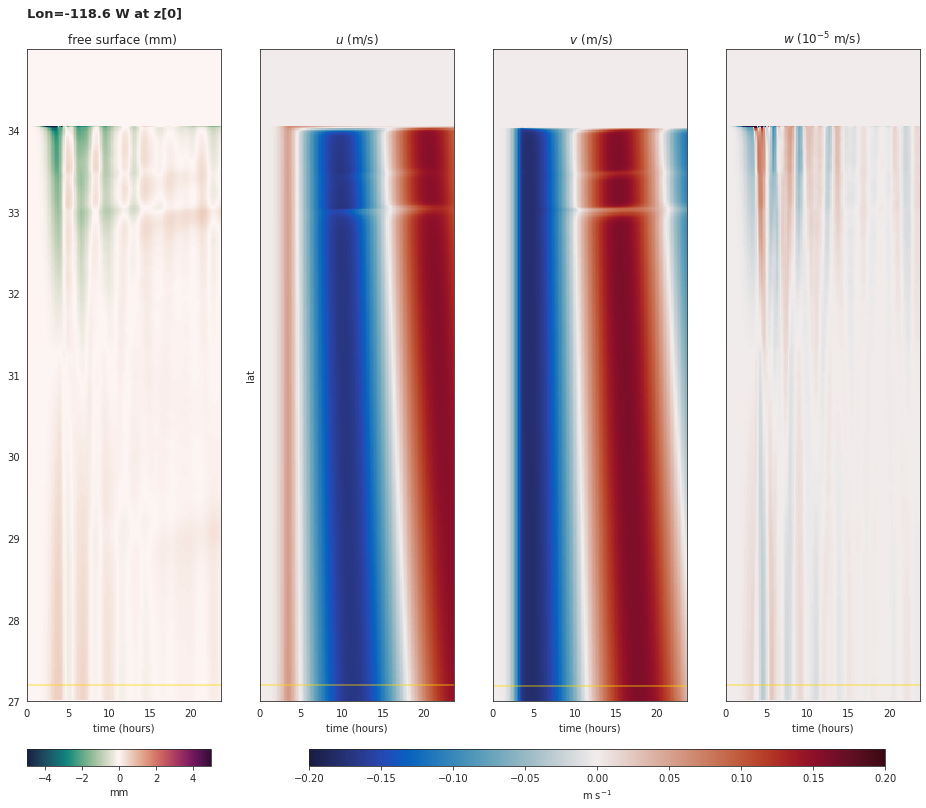

In [32]:
xi = 150
zi = 0
tf = 143
print('%1.1f W' %lon[xi])

Wu = ds['UVEL'][:tf,zi,:,xi] 
Wv = ds['VVEL'][:tf,zi,:,xi]
Ww = ds['WVEL'][:tf,zi,:,xi]
eta = ds['ETAN'][:tf,:,xi]

fig, (ax4,ax0,ax1,ax2) = plt.subplots(1,4,figsize=(16,12), sharey=True, sharex=True)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax4.set_facecolor('tan')

pc = ax4.pcolormesh(time[:tf]/(3600),lat,np.transpose(eta.data)*1E3,
                    cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax4.axhline(lat[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(time[:tf]/(3600),lat,np.transpose(Wu.data),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axhline(lat[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(time[:tf]/(3600),laty, np.transpose(Wv.data),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axhline(laty[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(time[:tf]/(3600),lat, np.transpose(Ww.data*1E5),
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axhline(lat[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.37, 0.05, 0.5, 0.02])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='horizontal',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.125, 0.05, 0.16, 0.02])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='horizontal',label='mm',)

ax2.set_xlabel('time (hours)')
ax1.set_xlabel('time (hours)')
ax0.set_xlabel('time (hours)')
ax4.set_xlabel('time (hours)')
ax0.set_ylabel('lat')

ax0.set_title(r'$u$ (m/s)')
ax1.set_title(' $v$ (m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax4.set_title('free surface (mm) ')

plt.text(0,1.05,'Lon=%1.1f W at z[%d]' %(lon[xi],zi),transform=ax4.transAxes, fontweight='bold', fontsize=13)
plt.show()

-118.6 W


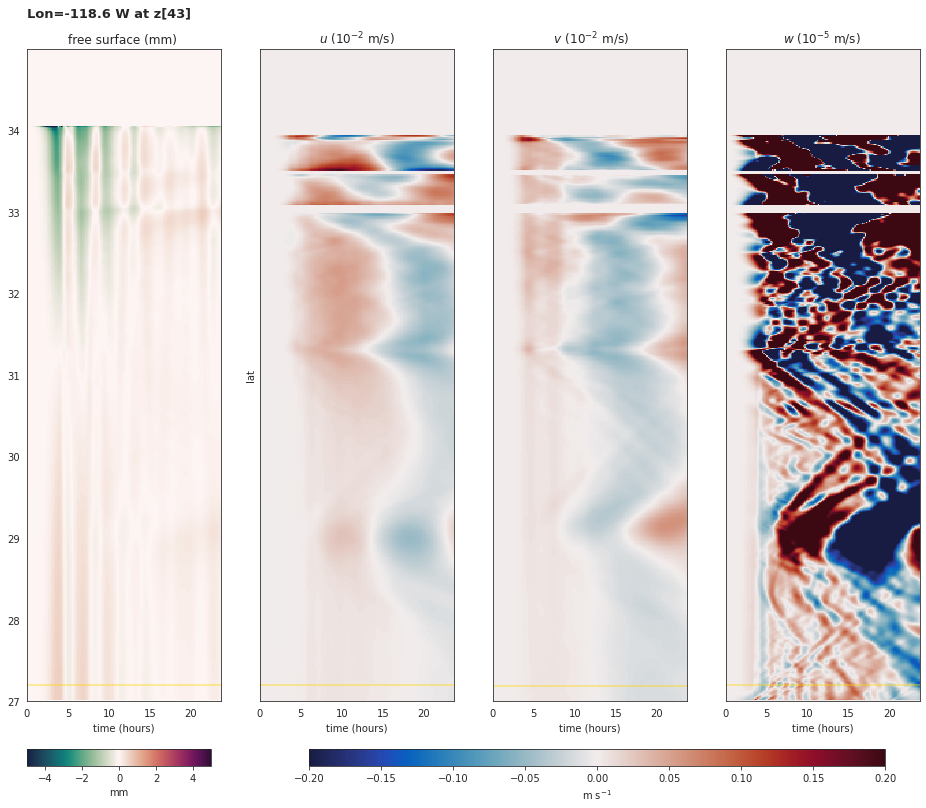

In [72]:
xi = 150
zi = 43
tf = 143
print('%1.1f W' %lon[xi])

Wu = ds['UVEL'][:tf,zi,:,xi] 
Wv = ds['VVEL'][:tf,zi,:,xi]
Ww = ds['WVEL'][:tf,zi,:,xi]
eta = ds['ETAN'][:tf,:,xi]

fig, (ax4,ax0,ax1,ax2) = plt.subplots(1,4,figsize=(16,12), sharey=True, sharex=True)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax4.set_facecolor('tan')

pc = ax4.pcolormesh(time[:tf]/(3600),lat,np.transpose(eta.data)*1E3,
                    cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax4.axhline(lat[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(time[:tf]/(3600),lat,np.transpose(Wu.data*1E2),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axhline(lat[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(time[:tf]/(3600),laty, np.transpose(Wv.data*1E2),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axhline(laty[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(time[:tf]/(3600),lat, np.transpose(Ww.data*1E5),
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axhline(lat[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.37, 0.05, 0.5, 0.02])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='horizontal',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.125, 0.05, 0.16, 0.02])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='horizontal',label='mm',)

ax2.set_xlabel('time (hours)')
ax1.set_xlabel('time (hours)')
ax0.set_xlabel('time (hours)')
ax4.set_xlabel('time (hours)')
ax0.set_ylabel('lat')

ax0.set_title(r'$u$ (10$^{-2}$ m/s)')
ax1.set_title(' $v$ (10$^{-2}$ m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax4.set_title('free surface (mm) ')

plt.text(0,1.05,'Lon=%1.1f W at z[%d]' %(lon[xi],zi),transform=ax4.transAxes, fontweight='bold', fontsize=13)
plt.show()

-120.8 W


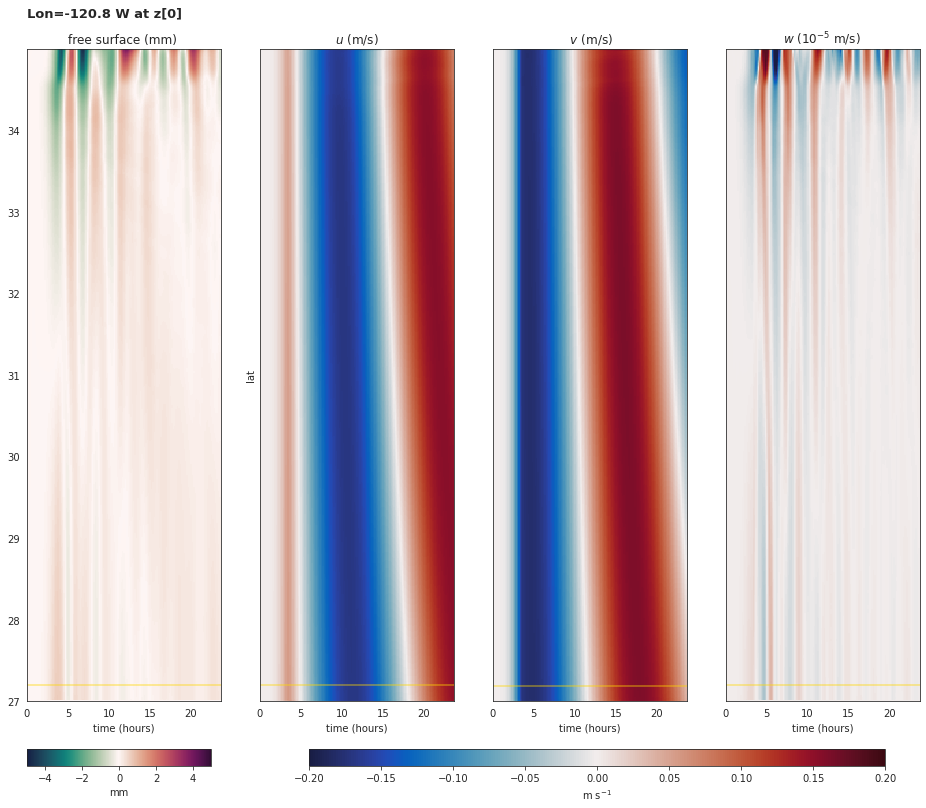

In [34]:
xi = 14
zi = 0
tf = 143
print('%1.1f W' %lon[xi])

Wu = ds['UVEL'][:tf,zi,:,xi] 
Wv = ds['VVEL'][:tf,zi,:,xi]
Ww = ds['WVEL'][:tf,zi,:,xi]
eta = ds['ETAN'][:tf,:,xi]

fig, (ax4,ax0,ax1,ax2) = plt.subplots(1,4,figsize=(16,12), sharey=True, sharex=True)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax4.set_facecolor('tan')

pc = ax4.pcolormesh(time[:tf]/(3600),lat,np.transpose(eta.data)*1E3,
                    cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax4.axhline(lat[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(time[:tf]/(3600),lat,np.transpose(Wu.data),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axhline(lat[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(time[:tf]/(3600),laty, np.transpose(Wv.data),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axhline(laty[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(time[:tf]/(3600),lat, np.transpose(Ww.data*1E5),
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axhline(lat[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.37, 0.05, 0.5, 0.02])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='horizontal',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.125, 0.05, 0.16, 0.02])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='horizontal',label='mm',)

ax2.set_xlabel('time (hours)')
ax1.set_xlabel('time (hours)')
ax0.set_xlabel('time (hours)')
ax4.set_xlabel('time (hours)')
ax0.set_ylabel('lat')

ax0.set_title(r'$u$ (m/s)')
ax1.set_title(' $v$ (m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax4.set_title('free surface (mm) ')

plt.text(0,1.05,'Lon=%1.1f W at z[%d]' %(lon[xi],zi),transform=ax4.transAxes, fontweight='bold', fontsize=13)
plt.show()

-121.0 W


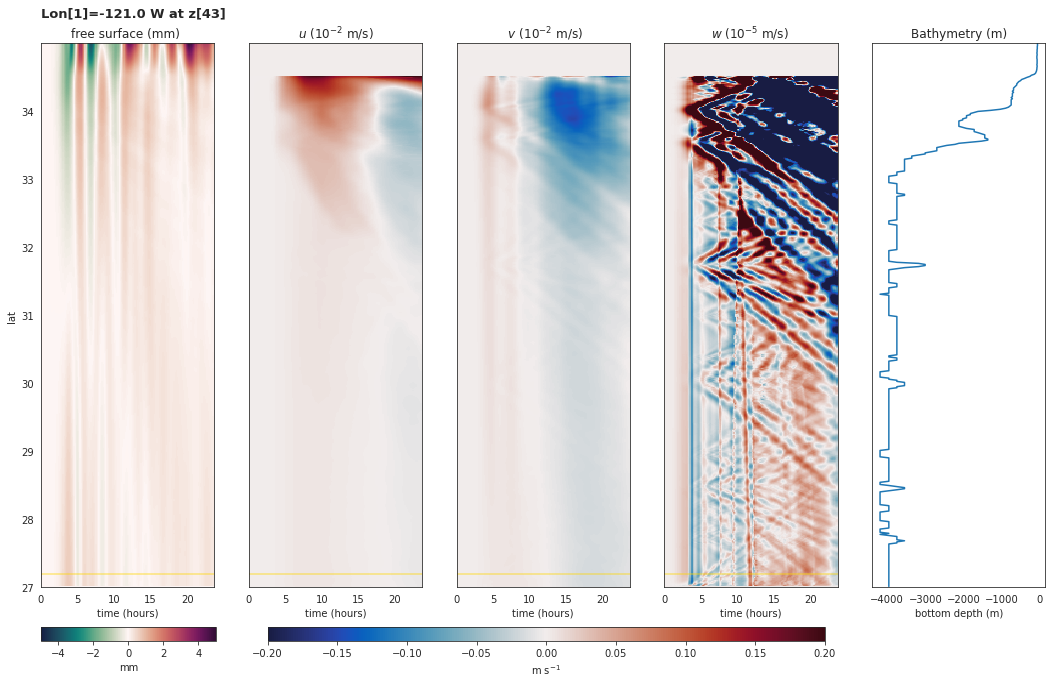

In [69]:
xi = 1
zi = 43
tf = 143
print('%1.1f W' %lon[xi])

Wu = ds['UVEL'][:tf,zi,:,xi] 
Wv = ds['VVEL'][:tf,zi,:,xi]
Ww = ds['WVEL'][:tf,zi,:,xi]
eta = ds['ETAN'][:tf,:,xi]

fig, (ax4,ax0,ax1,ax2,ax3) = plt.subplots(1,5,figsize=(18,10), sharey=True, sharex=False)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax4.set_facecolor('tan')

pc = ax4.pcolormesh(time[:tf]/(3600),lat,np.transpose(eta.data)*1E3,
                    cmap=cmo.cm.curl, vmin=-5, vmax=5)
ax4.axhline(lat[12], color='gold', alpha=0.5)

pc = ax0.pcolormesh(time[:tf]/(3600),lat,np.transpose(Wu.data*1E2),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax0.axhline(lat[12], color='gold', alpha=0.5)
pc = ax1.pcolormesh(time[:tf]/(3600),laty, np.transpose(Wv.data*1E2),
                    cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax1.axhline(laty[12], color='gold', alpha=0.5)

pc = ax2.pcolormesh(time[:tf]/(3600),lat, np.transpose(Ww.data*1E5),
               cmap=cmo.cm.balance, vmin=-2E-1, vmax=2E-1)
ax2.axhline(lat[12], color='gold', alpha=0.5)

norm = mpl.colors.Normalize(vmin=-2E-1, vmax=2E-1)
cbar_ax = fig.add_axes([0.3, 0.05, 0.43, 0.02])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='horizontal',label='m s$^{-1}$')

norm2 = mpl.colors.Normalize(vmin=-5, vmax=5)
cbar_ax2 = fig.add_axes([0.125, 0.05, 0.135, 0.02])
cb2 = fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmo.cm.curl),
                  cax=cbar_ax2, orientation='horizontal',label='mm',)

ax3.plot(-dep_masked[:,xi],lat)
ax3.set_xlabel('bottom depth (m)')
ax2.set_xlabel('time (hours)')
ax1.set_xlabel('time (hours)')
ax0.set_xlabel('time (hours)')
ax4.set_xlabel('time (hours)')
ax4.set_ylabel('lat')

ax0.set_title(r'$u$ (10$^{-2}$ m/s)')
ax1.set_title(' $v$ (10$^{-2}$ m/s)' )
ax2.set_title('$w$ (10$^{-5}$ m/s) ')
ax4.set_title('free surface (mm) ')
ax3.set_title('Bathymetry (m)')
plt.text(0,1.05,'Lon[%d]=%1.1f W at z[%d]' %(xi,lon[xi],zi),transform=ax4.transAxes, fontweight='bold', fontsize=13)
plt.show()

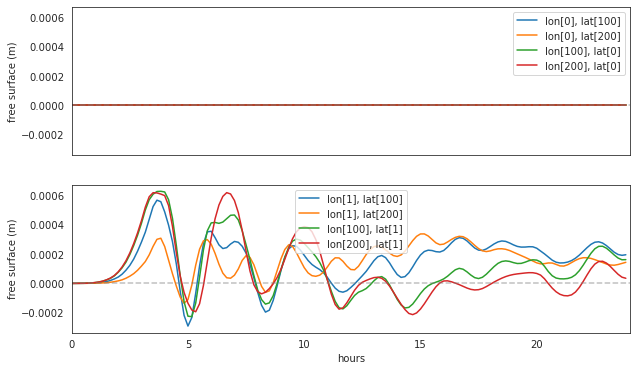

In [77]:
xs = [0,0,100,200]
ys = [100,200,0,0]
tf = 144

eta0 = ds['ETAN'][:,ys[0],xs[0]]
eta1 = ds['ETAN'][:,ys[1],xs[1]]
eta2 = ds['ETAN'][:,ys[2],xs[2]]
eta3 = ds['ETAN'][:,ys[3],xs[3]]

fig, (ax0, ax1) = plt.subplots(2,1,figsize=(10,6), sharey=True, sharex=True)
ax0.plot(time[:tf]/(3600),eta0, label='lon[%d], lat[%d]' %(xs[0],ys[0]))
ax0.plot(time[:tf]/(3600),eta1, label='lon[%d], lat[%d]' %(xs[1],ys[1]))
ax0.plot(time[:tf]/(3600),eta2, label='lon[%d], lat[%d]' %(xs[2],ys[2]))
ax0.plot(time[:tf]/(3600),eta3, label='lon[%d], lat[%d]' %(xs[3],ys[3]))
ax0.axhline(0, color='0.5', alpha=0.5, linestyle='--')
ax0.set_xlim(0,time[tf]/3600)
ax0.set_ylabel('free surface (m)')
ax0.legend()

#--------------------------------------------------
xs = [1,1,100,200]
ys = [100,200,1,1]

eta0 = ds['ETAN'][:,ys[0],xs[0]]
eta1 = ds['ETAN'][:,ys[1],xs[1]]
eta2 = ds['ETAN'][:,ys[2],xs[2]]
eta3 = ds['ETAN'][:,ys[3],xs[3]]

ax1.plot(time[:tf]/(3600),eta0, label='lon[%d], lat[%d]' %(xs[0],ys[0]))
ax1.plot(time[:tf]/(3600),eta1, label='lon[%d], lat[%d]' %(xs[1],ys[1]))
ax1.plot(time[:tf]/(3600),eta2, label='lon[%d], lat[%d]' %(xs[2],ys[2]))
ax1.plot(time[:tf]/(3600),eta3, label='lon[%d], lat[%d]' %(xs[3],ys[3]))
ax1.axhline(0, color='0.5', alpha=0.5, linestyle='--')
ax1.set_xlim(0,time[tf]/3600)
ax1.set_xlabel('hours')
ax1.set_ylabel('free surface (m)')
ax1.legend()

In [ ]:
xs = [0,0,100,200]
ys = [100,200,0,0]
tf = 144
zi = 43

u0 = ds['UVEL'][:,0,ys[0],xs[0]]
u1 = ds['UVEL'][:,0,ys[1],xs[1]]
u2 = ds['UVEL'][:,0,ys[2],xs[2]]
u3 = ds['UVEL'][:,0,ys[3],xs[3]]

u0sub = ds['UVEL'][:,zi,ys[0],xs[0]]
u1sub = ds['UVEL'][:,zi,ys[1],xs[1]]
u2sub = ds['UVEL'][:,zi,ys[2],xs[2]]
u3sub = ds['UVEL'][:,zi,ys[3],xs[3]]

fig, (ax0, ax1) = plt.subplots(2,1,figsize=(10,6), sharey=True, sharex=True)
ax0.plot(time[:tf]/(3600),u0, color='orange', label='lon[%d], lat[%d]' %(xs[0],ys[0]))
ax0.plot(time[:tf]/(3600),u1, color='red',label='lon[%d], lat[%d]' %(xs[1],ys[1]))
ax0.plot(time[:tf]/(3600),u2, color='geen',label='lon[%d], lat[%d]' %(xs[2],ys[2]))
ax0.plot(time[:tf]/(3600),u3, color='purple',label='lon[%d], lat[%d]' %(xs[3],ys[3]))
ax0.plot(time[:tf]/(3600),u0sub, color='orange',label='lon[%d], lat[%d], z[%d]' %(xs[0],ys[0],zi))
ax0.plot(time[:tf]/(3600),u1sub, color='red',label='lon[%d], lat[%d], z[%d]' %(xs[1],ys[1],zi))
ax0.plot(time[:tf]/(3600),u2sub, color='green',label='lon[%d], lat[%d], z[%d]' %(xs[2],ys[2],zi))
ax0.plot(time[:tf]/(3600),u3sub, color='purple',label='lon[%d], lat[%d], z[%d]' %(xs[3],ys[3],zi))

ax0.axhline(0, color='0.5', alpha=0.5, linestyle='--')
ax0.set_xlim(0,time[tf]/3600)
ax0.set_ylabel('u (ms$^{-1}$)')
ax0.legend()

#--------------------------------------------------
xs = [1,1,100,200]
ys = [100,200,1,1]

u0 = ds['UVEL'][:,0,ys[0],xs[0]]
u1 = ds['UVEL'][:,0,ys[1],xs[1]]
u2 = ds['UVEL'][:,0,ys[2],xs[2]]
u3 = ds['UVEL'][:,0,ys[3],xs[3]]

u0sub = ds['UVEL'][:,zi,ys[0],xs[0]]
u1sub = ds['UVEL'][:,zi,ys[1],xs[1]]
u2sub = ds['UVEL'][:,zi,ys[2],xs[2]]
u3sub = ds['UVEL'][:,zi,ys[3],xs[3]]

ax1.plot(time[:tf]/(3600),u0, color='orange', label='lon[%d], lat[%d]' %(xs[0],ys[0]))
ax1.plot(time[:tf]/(3600),u1, color='red',label='lon[%d], lat[%d]' %(xs[1],ys[1]))
ax1.plot(time[:tf]/(3600),u2, color='geen',label='lon[%d], lat[%d]' %(xs[2],ys[2]))
ax1.plot(time[:tf]/(3600),u3, color='purple',label='lon[%d], lat[%d]' %(xs[3],ys[3]))
ax1.plot(time[:tf]/(3600),u0sub, color='orange',label='lon[%d], lat[%d], z[%d]' %(xs[0],ys[0],zi))
ax1.plot(time[:tf]/(3600),u1sub, color='red',label='lon[%d], lat[%d], z[%d]' %(xs[1],ys[1],zi))
ax1.plot(time[:tf]/(3600),u2sub, color='green',label='lon[%d], lat[%d], z[%d]' %(xs[2],ys[2],zi))
ax1.plot(time[:tf]/(3600),u3sub, color='purple',label='lon[%d], lat[%d], z[%d]' %(xs[3],ys[3],zi))

ax1.axhline(0, color='0.5', alpha=0.5, linestyle='--')
ax1.set_xlim(0,time[tf]/3600)
ax1.set_xlabel('hours')
ax1.set_ylabel('u (ms$^{-1}$)')
ax1.legend()